In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
n_sensors=16

In [3]:
x = np.linspace(1, 16, 16)

In [4]:
t = np.linspace(0.1, 1.6, 16)

$y = 0.1x$,
$y = 0.2x$,
...,
$y = 1.6x$

In [5]:
sensors = np.zeros((16, 16))
for i in range(0, len(t)):
    for j in range(0, len(x)):
        sensors[i, j] = t[i] * x[j]

In [6]:
sensors = sensors.reshape(16, 16, 1)

In [7]:
sensors

array([[[ 0.1],
        [ 0.2],
        [ 0.3],
        [ 0.4],
        [ 0.5],
        [ 0.6],
        [ 0.7],
        [ 0.8],
        [ 0.9],
        [ 1. ],
        [ 1.1],
        [ 1.2],
        [ 1.3],
        [ 1.4],
        [ 1.5],
        [ 1.6]],

       [[ 0.2],
        [ 0.4],
        [ 0.6],
        [ 0.8],
        [ 1. ],
        [ 1.2],
        [ 1.4],
        [ 1.6],
        [ 1.8],
        [ 2. ],
        [ 2.2],
        [ 2.4],
        [ 2.6],
        [ 2.8],
        [ 3. ],
        [ 3.2]],

       [[ 0.3],
        [ 0.6],
        [ 0.9],
        [ 1.2],
        [ 1.5],
        [ 1.8],
        [ 2.1],
        [ 2.4],
        [ 2.7],
        [ 3. ],
        [ 3.3],
        [ 3.6],
        [ 3.9],
        [ 4.2],
        [ 4.5],
        [ 4.8]],

       [[ 0.4],
        [ 0.8],
        [ 1.2],
        [ 1.6],
        [ 2. ],
        [ 2.4],
        [ 2.8],
        [ 3.2],
        [ 3.6],
        [ 4. ],
        [ 4.4],
        [ 4.8],
        [ 5.2],
        [ 5.6],
  

In [8]:
sensors.shape

(16, 16, 1)

In [9]:
t = t.reshape((16, 1))

In [10]:
t_train, t_test, x_train, x_test = train_test_split(t, sensors, test_size=0.1, random_state=1)

In [11]:
t_test

array([[0.4],
       [1.4]])

In [12]:
input_time = tf.keras.Input(shape=(1))
reshape = tf.keras.layers.Reshape((1,))(input_time)

x_ = tf.keras.layers.Dense(units=5, activation='relu', name='firstHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(reshape)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='secondHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
x_ = tf.keras.layers.Dense(units=5, activation='relu', name='thirdHiddenLayerSensor',
                          kernel_regularizer=tf.keras.regularizers.l2(0.001))(x_)
output_data = tf.keras.layers.Dense(units=16, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((16, 1))(output_data)
# MLP
sensor_pred1 = tf.keras.Model(input_time, output_sensor)
sensor_pred2 = tf.keras.Model(input_time, output_sensor)
sensor_pred3 = tf.keras.Model(input_time, output_sensor)

In [13]:
sensor_pred1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [14]:
start1 = datetime.datetime.now()
history1 = sensor_pred1.fit(t_train, x_train, epochs=10000, shuffle=True)
end1 = datetime.datetime.now()

Epoch 1/10000
1/1 [==============================] - 1s 827ms/step - loss: 85.6561 - rmse: 9.2545
Epoch 2/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.6521 - rmse: 9.2543
Epoch 3/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.6480 - rmse: 9.2541
Epoch 4/10000
1/1 [==============================] - 0s 22ms/step - loss: 85.6439 - rmse: 9.2538
Epoch 5/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.6399 - rmse: 9.2536
Epoch 6/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.6358 - rmse: 9.2534
Epoch 7/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.6317 - rmse: 9.2532
Epoch 8/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.6276 - rmse: 9.2530
Epoch 9/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.6236 - rmse: 9.2527
Epoch 10/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.6195 - rmse: 9.2525
Epoch 11/10000
1/1 [================

1/1 [==============================] - 0s 3ms/step - loss: 85.3152 - rmse: 9.2361
Epoch 86/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.3111 - rmse: 9.2359
Epoch 87/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.3071 - rmse: 9.2356
Epoch 88/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.3030 - rmse: 9.2354
Epoch 89/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.2989 - rmse: 9.2352
Epoch 90/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2948 - rmse: 9.2350
Epoch 91/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2908 - rmse: 9.2348
Epoch 92/10000
1/1 [==============================] - 0s 5ms/step - loss: 85.2867 - rmse: 9.2345
Epoch 93/10000
1/1 [==============================] - 0s 4ms/step - loss: 85.2827 - rmse: 9.2343
Epoch 94/10000
1/1 [==============================] - 0s 3ms/step - loss: 85.2786 - rmse: 9.2341
Epoch 95/10000
1/1 [=========================

1/1 [==============================] - 0s 4ms/step - loss: 84.9512 - rmse: 9.2164
Epoch 169/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.9466 - rmse: 9.2161
Epoch 170/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.9420 - rmse: 9.2159
Epoch 171/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.9374 - rmse: 9.2156
Epoch 172/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.9328 - rmse: 9.2154
Epoch 173/10000
1/1 [==============================] - 0s 6ms/step - loss: 84.9282 - rmse: 9.2151
Epoch 174/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.9236 - rmse: 9.2149
Epoch 175/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.9190 - rmse: 9.2146
Epoch 176/10000
1/1 [==============================] - 0s 6ms/step - loss: 84.9145 - rmse: 9.2144
Epoch 177/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.9100 - rmse: 9.2141
Epoch 178/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 84.6074 - rmse: 9.1977
Epoch 252/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.6036 - rmse: 9.1975
Epoch 253/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.5998 - rmse: 9.1973
Epoch 254/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.5961 - rmse: 9.1971
Epoch 255/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.5923 - rmse: 9.1969
Epoch 256/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.5885 - rmse: 9.1967
Epoch 257/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.5848 - rmse: 9.1965
Epoch 258/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.5810 - rmse: 9.1963
Epoch 259/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.5772 - rmse: 9.1961
Epoch 260/10000
1/1 [==============================] - 0s 6ms/step - loss: 84.5734 - rmse: 9.1959
Epoch 261/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 84.2782 - rmse: 9.1798
Epoch 335/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2739 - rmse: 9.1796
Epoch 336/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2697 - rmse: 9.1793
Epoch 337/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2655 - rmse: 9.1791
Epoch 338/10000
1/1 [==============================] - 0s 5ms/step - loss: 84.2612 - rmse: 9.1789
Epoch 339/10000
1/1 [==============================] - 0s 3ms/step - loss: 84.2570 - rmse: 9.1786
Epoch 340/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2527 - rmse: 9.1784
Epoch 341/10000
1/1 [==============================] - 0s 6ms/step - loss: 84.2485 - rmse: 9.1782
Epoch 342/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2442 - rmse: 9.1779
Epoch 343/10000
1/1 [==============================] - 0s 4ms/step - loss: 84.2399 - rmse: 9.1777
Epoch 344/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 83.9041 - rmse: 9.1594
Epoch 418/10000
1/1 [==============================] - 0s 3ms/step - loss: 83.8993 - rmse: 9.1591
Epoch 419/10000
1/1 [==============================] - 0s 5ms/step - loss: 83.8945 - rmse: 9.1589
Epoch 420/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8896 - rmse: 9.1586
Epoch 421/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8848 - rmse: 9.1584
Epoch 422/10000
1/1 [==============================] - 0s 5ms/step - loss: 83.8800 - rmse: 9.1581
Epoch 423/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8751 - rmse: 9.1578
Epoch 424/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.8702 - rmse: 9.1576
Epoch 425/10000
1/1 [==============================] - 0s 5ms/step - loss: 83.8654 - rmse: 9.1573
Epoch 426/10000
1/1 [==============================] - 0s 3ms/step - loss: 83.8605 - rmse: 9.1570
Epoch 427/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 83.4760 - rmse: 9.1360
Epoch 501/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4705 - rmse: 9.1357
Epoch 502/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4649 - rmse: 9.1354
Epoch 503/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.4594 - rmse: 9.1351
Epoch 504/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4538 - rmse: 9.1348
Epoch 505/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4483 - rmse: 9.1345
Epoch 506/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.4427 - rmse: 9.1342
Epoch 507/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4371 - rmse: 9.1339
Epoch 508/10000
1/1 [==============================] - 0s 4ms/step - loss: 83.4315 - rmse: 9.1336
Epoch 509/10000
1/1 [==============================] - 0s 6ms/step - loss: 83.4259 - rmse: 9.1333
Epoch 510/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 82.9854 - rmse: 9.1091
Epoch 584/10000
1/1 [==============================] - 0s 5ms/step - loss: 82.9791 - rmse: 9.1088
Epoch 585/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.9728 - rmse: 9.1084
Epoch 586/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.9664 - rmse: 9.1081
Epoch 587/10000
1/1 [==============================] - 0s 5ms/step - loss: 82.9601 - rmse: 9.1077
Epoch 588/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.9538 - rmse: 9.1074
Epoch 589/10000
1/1 [==============================] - 0s 5ms/step - loss: 82.9474 - rmse: 9.1070
Epoch 590/10000
1/1 [==============================] - 0s 6ms/step - loss: 82.9410 - rmse: 9.1067
Epoch 591/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.9346 - rmse: 9.1063
Epoch 592/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.9282 - rmse: 9.1060
Epoch 593/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 82.4268 - rmse: 9.0784
Epoch 667/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.4196 - rmse: 9.0780
Epoch 668/10000
1/1 [==============================] - 0s 6ms/step - loss: 82.4125 - rmse: 9.0776
Epoch 669/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.4053 - rmse: 9.0772
Epoch 670/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.3981 - rmse: 9.0768
Epoch 671/10000
1/1 [==============================] - 0s 6ms/step - loss: 82.3909 - rmse: 9.0764
Epoch 672/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.3837 - rmse: 9.0760
Epoch 673/10000
1/1 [==============================] - 0s 3ms/step - loss: 82.3765 - rmse: 9.0757
Epoch 674/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.3693 - rmse: 9.0753
Epoch 675/10000
1/1 [==============================] - 0s 4ms/step - loss: 82.3620 - rmse: 9.0749
Epoch 676/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 81.7962 - rmse: 9.0436
Epoch 750/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.7882 - rmse: 9.0432
Epoch 751/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.7801 - rmse: 9.0427
Epoch 752/10000
1/1 [==============================] - 0s 5ms/step - loss: 81.7720 - rmse: 9.0423
Epoch 753/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.7639 - rmse: 9.0418
Epoch 754/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.7559 - rmse: 9.0414
Epoch 755/10000
1/1 [==============================] - 0s 6ms/step - loss: 81.7477 - rmse: 9.0409
Epoch 756/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.7396 - rmse: 9.0405
Epoch 757/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.7315 - rmse: 9.0401
Epoch 758/10000
1/1 [==============================] - 0s 6ms/step - loss: 81.7234 - rmse: 9.0396
Epoch 759/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 81.0881 - rmse: 9.0044
Epoch 833/10000
1/1 [==============================] - 0s 5ms/step - loss: 81.0791 - rmse: 9.0039
Epoch 834/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0700 - rmse: 9.0034
Epoch 835/10000
1/1 [==============================] - 0s 4ms/step - loss: 81.0610 - rmse: 9.0029
Epoch 836/10000
1/1 [==============================] - 0s 6ms/step - loss: 81.0519 - rmse: 9.0024
Epoch 837/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.0428 - rmse: 9.0019
Epoch 838/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.0337 - rmse: 9.0014
Epoch 839/10000
1/1 [==============================] - 0s 6ms/step - loss: 81.0246 - rmse: 9.0009
Epoch 840/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.0155 - rmse: 9.0004
Epoch 841/10000
1/1 [==============================] - 0s 3ms/step - loss: 81.0064 - rmse: 8.9999
Epoch 842/10000
1/1 [===============

1/1 [==============================] - 0s 3ms/step - loss: 80.2963 - rmse: 8.9603
Epoch 916/10000
1/1 [==============================] - 0s 4ms/step - loss: 80.2862 - rmse: 8.9598
Epoch 917/10000
1/1 [==============================] - 0s 7ms/step - loss: 80.2761 - rmse: 8.9592
Epoch 918/10000
1/1 [==============================] - 0s 3ms/step - loss: 80.2661 - rmse: 8.9586
Epoch 919/10000
1/1 [==============================] - 0s 4ms/step - loss: 80.2560 - rmse: 8.9581
Epoch 920/10000
1/1 [==============================] - 0s 6ms/step - loss: 80.2459 - rmse: 8.9575
Epoch 921/10000
1/1 [==============================] - 0s 4ms/step - loss: 80.2358 - rmse: 8.9569
Epoch 922/10000
1/1 [==============================] - 0s 4ms/step - loss: 80.2256 - rmse: 8.9564
Epoch 923/10000
1/1 [==============================] - 0s 5ms/step - loss: 80.2155 - rmse: 8.9558
Epoch 924/10000
1/1 [==============================] - 0s 3ms/step - loss: 80.2053 - rmse: 8.9552
Epoch 925/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 79.4178 - rmse: 8.9112
Epoch 999/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.4067 - rmse: 8.9105
Epoch 1000/10000
1/1 [==============================] - 0s 5ms/step - loss: 79.3955 - rmse: 8.9099
Epoch 1001/10000
1/1 [==============================] - 0s 9ms/step - loss: 79.3844 - rmse: 8.9093
Epoch 1002/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.3732 - rmse: 8.9087
Epoch 1003/10000
1/1 [==============================] - 0s 8ms/step - loss: 79.3620 - rmse: 8.9080
Epoch 1004/10000
1/1 [==============================] - 0s 5ms/step - loss: 79.3508 - rmse: 8.9074
Epoch 1005/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.3396 - rmse: 8.9068
Epoch 1006/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.3283 - rmse: 8.9061
Epoch 1007/10000
1/1 [==============================] - 0s 4ms/step - loss: 79.3171 - rmse: 8.9055
Epoch 1008/10000
1/1 [======

1/1 [==============================] - 0s 5ms/step - loss: 78.4594 - rmse: 8.8572
Epoch 1081/10000
1/1 [==============================] - 0s 6ms/step - loss: 78.4472 - rmse: 8.8565
Epoch 1082/10000
1/1 [==============================] - 0s 5ms/step - loss: 78.4349 - rmse: 8.8558
Epoch 1083/10000
1/1 [==============================] - 0s 5ms/step - loss: 78.4226 - rmse: 8.8552
Epoch 1084/10000
1/1 [==============================] - 0s 7ms/step - loss: 78.4104 - rmse: 8.8545
Epoch 1085/10000
1/1 [==============================] - 0s 5ms/step - loss: 78.3980 - rmse: 8.8538
Epoch 1086/10000
1/1 [==============================] - 0s 6ms/step - loss: 78.3857 - rmse: 8.8531
Epoch 1087/10000
1/1 [==============================] - 0s 5ms/step - loss: 78.3734 - rmse: 8.8524
Epoch 1088/10000
1/1 [==============================] - 0s 4ms/step - loss: 78.3610 - rmse: 8.8517
Epoch 1089/10000
1/1 [==============================] - 0s 7ms/step - loss: 78.3486 - rmse: 8.8510
Epoch 1090/10000
1/1 [=====

1/1 [==============================] - 0s 5ms/step - loss: 77.4081 - rmse: 8.7977
Epoch 1163/10000
1/1 [==============================] - 0s 9ms/step - loss: 77.3947 - rmse: 8.7969
Epoch 1164/10000
1/1 [==============================] - 0s 5ms/step - loss: 77.3812 - rmse: 8.7962
Epoch 1165/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3678 - rmse: 8.7954
Epoch 1166/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3543 - rmse: 8.7946
Epoch 1167/10000
1/1 [==============================] - 0s 5ms/step - loss: 77.3408 - rmse: 8.7939
Epoch 1168/10000
1/1 [==============================] - 0s 9ms/step - loss: 77.3273 - rmse: 8.7931
Epoch 1169/10000
1/1 [==============================] - 0s 4ms/step - loss: 77.3138 - rmse: 8.7923
Epoch 1170/10000
1/1 [==============================] - 0s 9ms/step - loss: 77.3002 - rmse: 8.7916
Epoch 1171/10000
1/1 [==============================] - 0s 5ms/step - loss: 77.2867 - rmse: 8.7908
Epoch 1172/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 76.1991 - rmse: 8.7287
Epoch 1245/10000
1/1 [==============================] - 0s 5ms/step - loss: 76.1819 - rmse: 8.7277
Epoch 1246/10000
1/1 [==============================] - 0s 8ms/step - loss: 76.1646 - rmse: 8.7267
Epoch 1247/10000
1/1 [==============================] - 0s 5ms/step - loss: 76.1474 - rmse: 8.7257
Epoch 1248/10000
1/1 [==============================] - 0s 9ms/step - loss: 76.1301 - rmse: 8.7248
Epoch 1249/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.1129 - rmse: 8.7238
Epoch 1250/10000
1/1 [==============================] - 0s 10ms/step - loss: 76.0956 - rmse: 8.7228
Epoch 1251/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.0783 - rmse: 8.7218
Epoch 1252/10000
1/1 [==============================] - 0s 9ms/step - loss: 76.0610 - rmse: 8.7208
Epoch 1253/10000
1/1 [==============================] - 0s 4ms/step - loss: 76.0436 - rmse: 8.7198
Epoch 1254/10000
1/1 [====

1/1 [==============================] - 0s 10ms/step - loss: 74.7424 - rmse: 8.6449
Epoch 1327/10000
1/1 [==============================] - 0s 5ms/step - loss: 74.7241 - rmse: 8.6438
Epoch 1328/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.7057 - rmse: 8.6427
Epoch 1329/10000
1/1 [==============================] - 0s 5ms/step - loss: 74.6873 - rmse: 8.6417
Epoch 1330/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.6689 - rmse: 8.6406
Epoch 1331/10000
1/1 [==============================] - 0s 9ms/step - loss: 74.6506 - rmse: 8.6395
Epoch 1332/10000
1/1 [==============================] - 0s 5ms/step - loss: 74.6322 - rmse: 8.6385
Epoch 1333/10000
1/1 [==============================] - 0s 9ms/step - loss: 74.6137 - rmse: 8.6374
Epoch 1334/10000
1/1 [==============================] - 0s 4ms/step - loss: 74.5953 - rmse: 8.6363
Epoch 1335/10000
1/1 [==============================] - 0s 9ms/step - loss: 74.5769 - rmse: 8.6353
Epoch 1336/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 73.1937 - rmse: 8.5548
Epoch 1409/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.1742 - rmse: 8.5537
Epoch 1410/10000
1/1 [==============================] - 0s 8ms/step - loss: 73.1548 - rmse: 8.5525
Epoch 1411/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.1353 - rmse: 8.5514
Epoch 1412/10000
1/1 [==============================] - 0s 9ms/step - loss: 73.1158 - rmse: 8.5503
Epoch 1413/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.0963 - rmse: 8.5491
Epoch 1414/10000
1/1 [==============================] - 0s 10ms/step - loss: 73.0768 - rmse: 8.5480
Epoch 1415/10000
1/1 [==============================] - 0s 5ms/step - loss: 73.0572 - rmse: 8.5468
Epoch 1416/10000
1/1 [==============================] - 0s 9ms/step - loss: 73.0376 - rmse: 8.5457
Epoch 1417/10000
1/1 [==============================] - 0s 4ms/step - loss: 73.0181 - rmse: 8.5445
Epoch 1418/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 71.5460 - rmse: 8.4580
Epoch 1491/10000
1/1 [==============================] - 0s 5ms/step - loss: 71.5252 - rmse: 8.4567
Epoch 1492/10000
1/1 [==============================] - 0s 5ms/step - loss: 71.5044 - rmse: 8.4555
Epoch 1493/10000
1/1 [==============================] - 0s 5ms/step - loss: 71.4836 - rmse: 8.4543
Epoch 1494/10000
1/1 [==============================] - 0s 10ms/step - loss: 71.4628 - rmse: 8.4530
Epoch 1495/10000
1/1 [==============================] - 0s 5ms/step - loss: 71.4419 - rmse: 8.4518
Epoch 1496/10000
1/1 [==============================] - 0s 8ms/step - loss: 71.4210 - rmse: 8.4506
Epoch 1497/10000
1/1 [==============================] - 0s 4ms/step - loss: 71.4001 - rmse: 8.4493
Epoch 1498/10000
1/1 [==============================] - 0s 9ms/step - loss: 71.3792 - rmse: 8.4481
Epoch 1499/10000
1/1 [==============================] - 0s 4ms/step - loss: 71.3583 - rmse: 8.4468
Epoch 1500/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 69.7843 - rmse: 8.3532
Epoch 1573/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.7621 - rmse: 8.3518
Epoch 1574/10000
1/1 [==============================] - 0s 4ms/step - loss: 69.7399 - rmse: 8.3505
Epoch 1575/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.7177 - rmse: 8.3492
Epoch 1576/10000
1/1 [==============================] - 0s 4ms/step - loss: 69.6955 - rmse: 8.3478
Epoch 1577/10000
1/1 [==============================] - 0s 10ms/step - loss: 69.6732 - rmse: 8.3465
Epoch 1578/10000
1/1 [==============================] - 0s 4ms/step - loss: 69.6509 - rmse: 8.3452
Epoch 1579/10000
1/1 [==============================] - 0s 9ms/step - loss: 69.6286 - rmse: 8.3438
Epoch 1580/10000
1/1 [==============================] - 0s 4ms/step - loss: 69.6063 - rmse: 8.3425
Epoch 1581/10000
1/1 [==============================] - 0s 4ms/step - loss: 69.5840 - rmse: 8.3412
Epoch 1582/10000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 67.9091 - rmse: 8.2401
Epoch 1655/10000
1/1 [==============================] - 0s 5ms/step - loss: 67.8855 - rmse: 8.2387
Epoch 1656/10000
1/1 [==============================] - 0s 4ms/step - loss: 67.8619 - rmse: 8.2373
Epoch 1657/10000
1/1 [==============================] - 0s 5ms/step - loss: 67.8384 - rmse: 8.2358
Epoch 1658/10000
1/1 [==============================] - 0s 4ms/step - loss: 67.8148 - rmse: 8.2344
Epoch 1659/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.7911 - rmse: 8.2330
Epoch 1660/10000
1/1 [==============================] - 0s 4ms/step - loss: 67.7675 - rmse: 8.2315
Epoch 1661/10000
1/1 [==============================] - 0s 9ms/step - loss: 67.7439 - rmse: 8.2301
Epoch 1662/10000
1/1 [==============================] - 0s 4ms/step - loss: 67.7202 - rmse: 8.2287
Epoch 1663/10000
1/1 [==============================] - 0s 10ms/step - loss: 67.6965 - rmse: 8.2272
Epoch 1664/10000
1/1 [====

1/1 [==============================] - 0s 9ms/step - loss: 65.9252 - rmse: 8.1189
Epoch 1737/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.9004 - rmse: 8.1173
Epoch 1738/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.8755 - rmse: 8.1158
Epoch 1739/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.8506 - rmse: 8.1143
Epoch 1740/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.8258 - rmse: 8.1127
Epoch 1741/10000
1/1 [==============================] - 0s 10ms/step - loss: 65.8009 - rmse: 8.1112
Epoch 1742/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.7760 - rmse: 8.1097
Epoch 1743/10000
1/1 [==============================] - 0s 9ms/step - loss: 65.7510 - rmse: 8.1081
Epoch 1744/10000
1/1 [==============================] - 0s 4ms/step - loss: 65.7261 - rmse: 8.1066
Epoch 1745/10000
1/1 [==============================] - 0s 10ms/step - loss: 65.7011 - rmse: 8.1050
Epoch 1746/10000
1/1 [===

1/1 [==============================] - 0s 8ms/step - loss: 63.8396 - rmse: 7.9894
Epoch 1819/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.8135 - rmse: 7.9877
Epoch 1820/10000
1/1 [==============================] - 0s 7ms/step - loss: 63.7875 - rmse: 7.9861
Epoch 1821/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.7614 - rmse: 7.9845
Epoch 1822/10000
1/1 [==============================] - 0s 9ms/step - loss: 63.7353 - rmse: 7.9829
Epoch 1823/10000
1/1 [==============================] - 0s 5ms/step - loss: 63.7093 - rmse: 7.9812
Epoch 1824/10000
1/1 [==============================] - 0s 10ms/step - loss: 63.6832 - rmse: 7.9796
Epoch 1825/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.6571 - rmse: 7.9779
Epoch 1826/10000
1/1 [==============================] - 0s 10ms/step - loss: 63.6309 - rmse: 7.9763
Epoch 1827/10000
1/1 [==============================] - 0s 4ms/step - loss: 63.6048 - rmse: 7.9747
Epoch 1828/10000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 61.6605 - rmse: 7.8518
Epoch 1901/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.6334 - rmse: 7.8501
Epoch 1902/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.6062 - rmse: 7.8484
Epoch 1903/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.5791 - rmse: 7.8466
Epoch 1904/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.5520 - rmse: 7.8449
Epoch 1905/10000
1/1 [==============================] - 0s 5ms/step - loss: 61.5248 - rmse: 7.8432
Epoch 1906/10000
1/1 [==============================] - 0s 9ms/step - loss: 61.4976 - rmse: 7.8414
Epoch 1907/10000
1/1 [==============================] - 0s 4ms/step - loss: 61.4704 - rmse: 7.8397
Epoch 1908/10000
1/1 [==============================] - 0s 5ms/step - loss: 61.4433 - rmse: 7.8380
Epoch 1909/10000
1/1 [==============================] - 0s 5ms/step - loss: 61.4160 - rmse: 7.8362
Epoch 1910/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 59.3978 - rmse: 7.7064
Epoch 1983/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.3697 - rmse: 7.7045
Epoch 1984/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.3417 - rmse: 7.7027
Epoch 1985/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.3136 - rmse: 7.7009
Epoch 1986/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.2855 - rmse: 7.6991
Epoch 1987/10000
1/1 [==============================] - 0s 6ms/step - loss: 59.2574 - rmse: 7.6973
Epoch 1988/10000
1/1 [==============================] - 0s 5ms/step - loss: 59.2293 - rmse: 7.6954
Epoch 1989/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.2011 - rmse: 7.6936
Epoch 1990/10000
1/1 [==============================] - 0s 4ms/step - loss: 59.1730 - rmse: 7.6918
Epoch 1991/10000
1/1 [==============================] - 0s 9ms/step - loss: 59.1448 - rmse: 7.6899
Epoch 1992/10000
1/1 [=====

1/1 [==============================] - 0s 10ms/step - loss: 57.0625 - rmse: 7.5533
Epoch 2065/10000
1/1 [==============================] - 0s 4ms/step - loss: 57.0336 - rmse: 7.5514
Epoch 2066/10000
1/1 [==============================] - 0s 9ms/step - loss: 57.0047 - rmse: 7.5495
Epoch 2067/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.9758 - rmse: 7.5476
Epoch 2068/10000
1/1 [==============================] - 0s 5ms/step - loss: 56.9469 - rmse: 7.5457
Epoch 2069/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.9180 - rmse: 7.5438
Epoch 2070/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.8890 - rmse: 7.5418
Epoch 2071/10000
1/1 [==============================] - 0s 9ms/step - loss: 56.8601 - rmse: 7.5399
Epoch 2072/10000
1/1 [==============================] - 0s 4ms/step - loss: 56.8312 - rmse: 7.5380
Epoch 2073/10000
1/1 [==============================] - 0s 9ms/step - loss: 56.8022 - rmse: 7.5361
Epoch 2074/10000
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 54.6664 - rmse: 7.3930
Epoch 2147/10000
1/1 [==============================] - 0s 10ms/step - loss: 54.6369 - rmse: 7.3910
Epoch 2148/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.6074 - rmse: 7.3890
Epoch 2149/10000
1/1 [==============================] - 0s 10ms/step - loss: 54.5778 - rmse: 7.3870
Epoch 2150/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.5482 - rmse: 7.3850
Epoch 2151/10000
1/1 [==============================] - 0s 7ms/step - loss: 54.5187 - rmse: 7.3830
Epoch 2152/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.4891 - rmse: 7.3810
Epoch 2153/10000
1/1 [==============================] - 0s 4ms/step - loss: 54.4595 - rmse: 7.3790
Epoch 2154/10000
1/1 [==============================] - 0s 7ms/step - loss: 54.4299 - rmse: 7.3770
Epoch 2155/10000
1/1 [==============================] - 0s 5ms/step - loss: 54.4003 - rmse: 7.3750
Epoch 2156/10000
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 52.2232 - rmse: 7.2259
Epoch 2229/10000
1/1 [==============================] - 0s 9ms/step - loss: 52.1931 - rmse: 7.2238
Epoch 2230/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.1631 - rmse: 7.2217
Epoch 2231/10000
1/1 [==============================] - 0s 9ms/step - loss: 52.1331 - rmse: 7.2196
Epoch 2232/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.1030 - rmse: 7.2175
Epoch 2233/10000
1/1 [==============================] - 0s 9ms/step - loss: 52.0730 - rmse: 7.2155
Epoch 2234/10000
1/1 [==============================] - 0s 4ms/step - loss: 52.0429 - rmse: 7.2134
Epoch 2235/10000
1/1 [==============================] - 0s 5ms/step - loss: 52.0129 - rmse: 7.2113
Epoch 2236/10000
1/1 [==============================] - 0s 5ms/step - loss: 51.9828 - rmse: 7.2092
Epoch 2237/10000
1/1 [==============================] - 0s 4ms/step - loss: 51.9528 - rmse: 7.2071
Epoch 2238/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 49.7477 - rmse: 7.0525
Epoch 2311/10000
1/1 [==============================] - 0s 10ms/step - loss: 49.7174 - rmse: 7.0503
Epoch 2312/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.6870 - rmse: 7.0482
Epoch 2313/10000
1/1 [==============================] - 0s 9ms/step - loss: 49.6567 - rmse: 7.0460
Epoch 2314/10000
1/1 [==============================] - 0s 5ms/step - loss: 49.6264 - rmse: 7.0439
Epoch 2315/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.5960 - rmse: 7.0417
Epoch 2316/10000
1/1 [==============================] - 0s 5ms/step - loss: 49.5657 - rmse: 7.0396
Epoch 2317/10000
1/1 [==============================] - 0s 5ms/step - loss: 49.5354 - rmse: 7.0374
Epoch 2318/10000
1/1 [==============================] - 0s 9ms/step - loss: 49.5050 - rmse: 7.0353
Epoch 2319/10000
1/1 [==============================] - 0s 4ms/step - loss: 49.4747 - rmse: 7.0331
Epoch 2320/10000
1/1 [====

1/1 [==============================] - 0s 10ms/step - loss: 47.2564 - rmse: 6.8736
Epoch 2393/10000
1/1 [==============================] - 0s 4ms/step - loss: 47.2259 - rmse: 6.8714
Epoch 2394/10000
1/1 [==============================] - 0s 10ms/step - loss: 47.1955 - rmse: 6.8692
Epoch 2395/10000
1/1 [==============================] - 0s 5ms/step - loss: 47.1651 - rmse: 6.8669
Epoch 2396/10000
1/1 [==============================] - 0s 9ms/step - loss: 47.1347 - rmse: 6.8647
Epoch 2397/10000
1/1 [==============================] - 0s 4ms/step - loss: 47.1043 - rmse: 6.8625
Epoch 2398/10000
1/1 [==============================] - 0s 5ms/step - loss: 47.0739 - rmse: 6.8603
Epoch 2399/10000
1/1 [==============================] - 0s 5ms/step - loss: 47.0435 - rmse: 6.8581
Epoch 2400/10000
1/1 [==============================] - 0s 4ms/step - loss: 47.0131 - rmse: 6.8559
Epoch 2401/10000
1/1 [==============================] - 0s 9ms/step - loss: 46.9827 - rmse: 6.8536
Epoch 2402/10000
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 44.7664 - rmse: 6.6900
Epoch 2475/10000
1/1 [==============================] - 0s 9ms/step - loss: 44.7361 - rmse: 6.6877
Epoch 2476/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.7058 - rmse: 6.6855
Epoch 2477/10000
1/1 [==============================] - 0s 10ms/step - loss: 44.6755 - rmse: 6.6832
Epoch 2478/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.6453 - rmse: 6.6809
Epoch 2479/10000
1/1 [==============================] - 0s 7ms/step - loss: 44.6150 - rmse: 6.6787
Epoch 2480/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.5847 - rmse: 6.6764
Epoch 2481/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.5545 - rmse: 6.6741
Epoch 2482/10000
1/1 [==============================] - 0s 8ms/step - loss: 44.5242 - rmse: 6.6719
Epoch 2483/10000
1/1 [==============================] - 0s 4ms/step - loss: 44.4939 - rmse: 6.6696
Epoch 2484/10000
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 42.2950 - rmse: 6.5026
Epoch 2557/10000
1/1 [==============================] - 0s 10ms/step - loss: 42.2651 - rmse: 6.5003
Epoch 2558/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.2351 - rmse: 6.4980
Epoch 2559/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.2052 - rmse: 6.4957
Epoch 2560/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.1752 - rmse: 6.4934
Epoch 2561/10000
1/1 [==============================] - 0s 5ms/step - loss: 42.1453 - rmse: 6.4911
Epoch 2562/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.1154 - rmse: 6.4888
Epoch 2563/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.0854 - rmse: 6.4865
Epoch 2564/10000
1/1 [==============================] - 0s 9ms/step - loss: 42.0555 - rmse: 6.4842
Epoch 2565/10000
1/1 [==============================] - 0s 4ms/step - loss: 42.0256 - rmse: 6.4819
Epoch 2566/10000
1/1 [====

1/1 [==============================] - 0s 10ms/step - loss: 39.8588 - rmse: 6.3125
Epoch 2639/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.8294 - rmse: 6.3102
Epoch 2640/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.7999 - rmse: 6.3079
Epoch 2641/10000
1/1 [==============================] - 0s 5ms/step - loss: 39.7705 - rmse: 6.3055
Epoch 2642/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.7411 - rmse: 6.3032
Epoch 2643/10000
1/1 [==============================] - 0s 5ms/step - loss: 39.7117 - rmse: 6.3009
Epoch 2644/10000
1/1 [==============================] - 0s 9ms/step - loss: 39.6823 - rmse: 6.2985
Epoch 2645/10000
1/1 [==============================] - 0s 5ms/step - loss: 39.6530 - rmse: 6.2962
Epoch 2646/10000
1/1 [==============================] - 0s 10ms/step - loss: 39.6236 - rmse: 6.2939
Epoch 2647/10000
1/1 [==============================] - 0s 4ms/step - loss: 39.5942 - rmse: 6.2915
Epoch 2648/10000
1/1 [===

1/1 [==============================] - 0s 6ms/step - loss: 37.4730 - rmse: 6.1206
Epoch 2721/10000
1/1 [==============================] - 0s 5ms/step - loss: 37.4443 - rmse: 6.1183
Epoch 2722/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.4156 - rmse: 6.1159
Epoch 2723/10000
1/1 [==============================] - 0s 9ms/step - loss: 37.3869 - rmse: 6.1136
Epoch 2724/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.3582 - rmse: 6.1112
Epoch 2725/10000
1/1 [==============================] - 0s 10ms/step - loss: 37.3295 - rmse: 6.1089
Epoch 2726/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.3008 - rmse: 6.1066
Epoch 2727/10000
1/1 [==============================] - 0s 9ms/step - loss: 37.2722 - rmse: 6.1042
Epoch 2728/10000
1/1 [==============================] - 0s 4ms/step - loss: 37.2435 - rmse: 6.1019
Epoch 2729/10000
1/1 [==============================] - 0s 10ms/step - loss: 37.2149 - rmse: 6.0995
Epoch 2730/10000
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 35.1513 - rmse: 5.9279
Epoch 2803/10000
1/1 [==============================] - 0s 9ms/step - loss: 35.1234 - rmse: 5.9256
Epoch 2804/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.0956 - rmse: 5.9232
Epoch 2805/10000
1/1 [==============================] - 0s 8ms/step - loss: 35.0677 - rmse: 5.9209
Epoch 2806/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.0399 - rmse: 5.9185
Epoch 2807/10000
1/1 [==============================] - 0s 4ms/step - loss: 35.0121 - rmse: 5.9162
Epoch 2808/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.9842 - rmse: 5.9138
Epoch 2809/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.9564 - rmse: 5.9115
Epoch 2810/10000
1/1 [==============================] - 0s 10ms/step - loss: 34.9286 - rmse: 5.9091
Epoch 2811/10000
1/1 [==============================] - 0s 4ms/step - loss: 34.9009 - rmse: 5.9068
Epoch 2812/10000
1/1 [====

1/1 [==============================] - 0s 6ms/step - loss: 32.9051 - rmse: 5.7353
Epoch 2885/10000
1/1 [==============================] - 0s 4ms/step - loss: 32.8782 - rmse: 5.7330
Epoch 2886/10000
1/1 [==============================] - 0s 10ms/step - loss: 32.8513 - rmse: 5.7306
Epoch 2887/10000
1/1 [==============================] - 0s 4ms/step - loss: 32.8245 - rmse: 5.7283
Epoch 2888/10000
1/1 [==============================] - 0s 8ms/step - loss: 32.7976 - rmse: 5.7259
Epoch 2889/10000
1/1 [==============================] - 0s 4ms/step - loss: 32.7708 - rmse: 5.7236
Epoch 2890/10000
1/1 [==============================] - 0s 4ms/step - loss: 32.7440 - rmse: 5.7213
Epoch 2891/10000
1/1 [==============================] - 0s 4ms/step - loss: 32.7172 - rmse: 5.7189
Epoch 2892/10000
1/1 [==============================] - 0s 5ms/step - loss: 32.6904 - rmse: 5.7166
Epoch 2893/10000
1/1 [==============================] - 0s 9ms/step - loss: 32.6636 - rmse: 5.7142
Epoch 2894/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 30.7440 - rmse: 5.5437
Epoch 2967/10000
1/1 [==============================] - 0s 6ms/step - loss: 30.7182 - rmse: 5.5414
Epoch 2968/10000
1/1 [==============================] - 0s 4ms/step - loss: 30.6924 - rmse: 5.5391
Epoch 2969/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.6667 - rmse: 5.5367
Epoch 2970/10000
1/1 [==============================] - 0s 4ms/step - loss: 30.6409 - rmse: 5.5344
Epoch 2971/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.6152 - rmse: 5.5321
Epoch 2972/10000
1/1 [==============================] - 0s 5ms/step - loss: 30.5894 - rmse: 5.5298
Epoch 2973/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.5637 - rmse: 5.5274
Epoch 2974/10000
1/1 [==============================] - 0s 4ms/step - loss: 30.5380 - rmse: 5.5251
Epoch 2975/10000
1/1 [==============================] - 0s 9ms/step - loss: 30.5123 - rmse: 5.5228
Epoch 2976/10000
1/1 [=====

1/1 [==============================] - 0s 7ms/step - loss: 28.6759 - rmse: 5.3539
Epoch 3049/10000
1/1 [==============================] - 0s 4ms/step - loss: 28.6513 - rmse: 5.3516
Epoch 3050/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.6267 - rmse: 5.3493
Epoch 3051/10000
1/1 [==============================] - 0s 4ms/step - loss: 28.6021 - rmse: 5.3470
Epoch 3052/10000
1/1 [==============================] - 0s 10ms/step - loss: 28.5776 - rmse: 5.3447
Epoch 3053/10000
1/1 [==============================] - 0s 4ms/step - loss: 28.5530 - rmse: 5.3424
Epoch 3054/10000
1/1 [==============================] - 0s 9ms/step - loss: 28.5285 - rmse: 5.3401
Epoch 3055/10000
1/1 [==============================] - 0s 4ms/step - loss: 28.5039 - rmse: 5.3378
Epoch 3056/10000
1/1 [==============================] - 0s 6ms/step - loss: 28.4794 - rmse: 5.3355
Epoch 3057/10000
1/1 [==============================] - 0s 4ms/step - loss: 28.4549 - rmse: 5.3332
Epoch 3058/10000
1/1 [====

1/1 [==============================] - 0s 5ms/step - loss: 26.7075 - rmse: 5.1668
Epoch 3131/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.6842 - rmse: 5.1646
Epoch 3132/10000
1/1 [==============================] - 0s 4ms/step - loss: 26.6608 - rmse: 5.1623
Epoch 3133/10000
1/1 [==============================] - 0s 9ms/step - loss: 26.6375 - rmse: 5.1600
Epoch 3134/10000
1/1 [==============================] - 0s 4ms/step - loss: 26.6141 - rmse: 5.1578
Epoch 3135/10000
1/1 [==============================] - 0s 5ms/step - loss: 26.5908 - rmse: 5.1555
Epoch 3136/10000
1/1 [==============================] - 0s 5ms/step - loss: 26.5676 - rmse: 5.1533
Epoch 3137/10000
1/1 [==============================] - 0s 4ms/step - loss: 26.5443 - rmse: 5.1510
Epoch 3138/10000
1/1 [==============================] - 0s 10ms/step - loss: 26.5210 - rmse: 5.1487
Epoch 3139/10000
1/1 [==============================] - 0s 4ms/step - loss: 26.4978 - rmse: 5.1465
Epoch 3140/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 24.8443 - rmse: 4.9832
Epoch 3213/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.8223 - rmse: 4.9810
Epoch 3214/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.8002 - rmse: 4.9788
Epoch 3215/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.7782 - rmse: 4.9766
Epoch 3216/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.7562 - rmse: 4.9744
Epoch 3217/10000
1/1 [==============================] - 0s 5ms/step - loss: 24.7342 - rmse: 4.9722
Epoch 3218/10000
1/1 [==============================] - 0s 5ms/step - loss: 24.7123 - rmse: 4.9700
Epoch 3219/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.6903 - rmse: 4.9678
Epoch 3220/10000
1/1 [==============================] - 0s 9ms/step - loss: 24.6684 - rmse: 4.9656
Epoch 3221/10000
1/1 [==============================] - 0s 4ms/step - loss: 24.6465 - rmse: 4.9633
Epoch 3222/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 23.0912 - rmse: 4.8041
Epoch 3295/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.0705 - rmse: 4.8019
Epoch 3296/10000
1/1 [==============================] - 0s 5ms/step - loss: 23.0498 - rmse: 4.7998
Epoch 3297/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.0292 - rmse: 4.7976
Epoch 3298/10000
1/1 [==============================] - 0s 4ms/step - loss: 23.0085 - rmse: 4.7955
Epoch 3299/10000
1/1 [==============================] - 0s 9ms/step - loss: 22.9879 - rmse: 4.7933
Epoch 3300/10000
1/1 [==============================] - 0s 5ms/step - loss: 22.9673 - rmse: 4.7912
Epoch 3301/10000
1/1 [==============================] - 0s 9ms/step - loss: 22.9467 - rmse: 4.7890
Epoch 3302/10000
1/1 [==============================] - 0s 4ms/step - loss: 22.9262 - rmse: 4.7869
Epoch 3303/10000
1/1 [==============================] - 0s 5ms/step - loss: 22.9056 - rmse: 4.7847
Epoch 3304/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 21.4518 - rmse: 4.6303
Epoch 3377/10000
1/1 [==============================] - 0s 10ms/step - loss: 21.4325 - rmse: 4.6282
Epoch 3378/10000
1/1 [==============================] - 0s 4ms/step - loss: 21.4133 - rmse: 4.6262
Epoch 3379/10000
1/1 [==============================] - 0s 4ms/step - loss: 21.3940 - rmse: 4.6241
Epoch 3380/10000
1/1 [==============================] - 0s 5ms/step - loss: 21.3748 - rmse: 4.6220
Epoch 3381/10000
1/1 [==============================] - 0s 5ms/step - loss: 21.3556 - rmse: 4.6199
Epoch 3382/10000
1/1 [==============================] - 0s 8ms/step - loss: 21.3364 - rmse: 4.6178
Epoch 3383/10000
1/1 [==============================] - 0s 4ms/step - loss: 21.3173 - rmse: 4.6158
Epoch 3384/10000
1/1 [==============================] - 0s 9ms/step - loss: 21.2981 - rmse: 4.6137
Epoch 3385/10000
1/1 [==============================] - 0s 4ms/step - loss: 21.2790 - rmse: 4.6116
Epoch 3386/10000
1/1 [====

1/1 [==============================] - 0s 8ms/step - loss: 19.9289 - rmse: 4.4628
Epoch 3459/10000
1/1 [==============================] - 0s 5ms/step - loss: 19.9110 - rmse: 4.4608
Epoch 3460/10000
1/1 [==============================] - 0s 5ms/step - loss: 19.8932 - rmse: 4.4588
Epoch 3461/10000
1/1 [==============================] - 0s 4ms/step - loss: 19.8754 - rmse: 4.4568
Epoch 3462/10000
1/1 [==============================] - 0s 4ms/step - loss: 19.8576 - rmse: 4.4548
Epoch 3463/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.8398 - rmse: 4.4528
Epoch 3464/10000
1/1 [==============================] - 0s 4ms/step - loss: 19.8221 - rmse: 4.4508
Epoch 3465/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.8043 - rmse: 4.4488
Epoch 3466/10000
1/1 [==============================] - 0s 5ms/step - loss: 19.7866 - rmse: 4.4469
Epoch 3467/10000
1/1 [==============================] - 0s 9ms/step - loss: 19.7689 - rmse: 4.4449
Epoch 3468/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 18.5233 - rmse: 4.3025
Epoch 3541/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.5069 - rmse: 4.3005
Epoch 3542/10000
1/1 [==============================] - 0s 9ms/step - loss: 18.4904 - rmse: 4.2986
Epoch 3543/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.4741 - rmse: 4.2967
Epoch 3544/10000
1/1 [==============================] - 0s 5ms/step - loss: 18.4577 - rmse: 4.2948
Epoch 3545/10000
1/1 [==============================] - 0s 5ms/step - loss: 18.4413 - rmse: 4.2929
Epoch 3546/10000
1/1 [==============================] - 0s 4ms/step - loss: 18.4250 - rmse: 4.2910
Epoch 3547/10000
1/1 [==============================] - 0s 8ms/step - loss: 18.4087 - rmse: 4.2891
Epoch 3548/10000
1/1 [==============================] - 0s 5ms/step - loss: 18.3924 - rmse: 4.2872
Epoch 3549/10000
1/1 [==============================] - 0s 9ms/step - loss: 18.3761 - rmse: 4.2853
Epoch 3550/10000
1/1 [=====

1/1 [==============================] - 0s 9ms/step - loss: 17.2338 - rmse: 4.1499
Epoch 3623/10000
1/1 [==============================] - 0s 5ms/step - loss: 17.2188 - rmse: 4.1481
Epoch 3624/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.2038 - rmse: 4.1463
Epoch 3625/10000
1/1 [==============================] - 0s 5ms/step - loss: 17.1888 - rmse: 4.1445
Epoch 3626/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1738 - rmse: 4.1427
Epoch 3627/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1589 - rmse: 4.1408
Epoch 3628/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1440 - rmse: 4.1390
Epoch 3629/10000
1/1 [==============================] - 0s 10ms/step - loss: 17.1290 - rmse: 4.1372
Epoch 3630/10000
1/1 [==============================] - 0s 4ms/step - loss: 17.1141 - rmse: 4.1354
Epoch 3631/10000
1/1 [==============================] - 0s 9ms/step - loss: 17.0992 - rmse: 4.1336
Epoch 3632/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 16.0572 - rmse: 4.0056
Epoch 3705/10000
1/1 [==============================] - 0s 10ms/step - loss: 16.0435 - rmse: 4.0039
Epoch 3706/10000
1/1 [==============================] - 0s 4ms/step - loss: 16.0299 - rmse: 4.0022
Epoch 3707/10000
1/1 [==============================] - 0s 9ms/step - loss: 16.0162 - rmse: 4.0005
Epoch 3708/10000
1/1 [==============================] - 0s 4ms/step - loss: 16.0026 - rmse: 3.9988
Epoch 3709/10000
1/1 [==============================] - 0s 10ms/step - loss: 15.9890 - rmse: 3.9971
Epoch 3710/10000
1/1 [==============================] - 0s 4ms/step - loss: 15.9754 - rmse: 3.9954
Epoch 3711/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.9618 - rmse: 3.9937
Epoch 3712/10000
1/1 [==============================] - 0s 4ms/step - loss: 15.9483 - rmse: 3.9920
Epoch 3713/10000
1/1 [==============================] - 0s 9ms/step - loss: 15.9347 - rmse: 3.9903
Epoch 3714/10000
1/1 [===

1/1 [==============================] - 0s 5ms/step - loss: 14.9880 - rmse: 3.8698
Epoch 3787/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.9756 - rmse: 3.8682
Epoch 3788/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9632 - rmse: 3.8666
Epoch 3789/10000
1/1 [==============================] - 0s 10ms/step - loss: 14.9509 - rmse: 3.8650
Epoch 3790/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9385 - rmse: 3.8634
Epoch 3791/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.9262 - rmse: 3.8618
Epoch 3792/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.9138 - rmse: 3.8602
Epoch 3793/10000
1/1 [==============================] - 0s 10ms/step - loss: 14.9015 - rmse: 3.8586
Epoch 3794/10000
1/1 [==============================] - 0s 4ms/step - loss: 14.8892 - rmse: 3.8570
Epoch 3795/10000
1/1 [==============================] - 0s 9ms/step - loss: 14.8769 - rmse: 3.8554
Epoch 3796/10000
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 14.0191 - rmse: 3.7425
Epoch 3869/10000
1/1 [==============================] - 0s 6ms/step - loss: 14.0078 - rmse: 3.7410
Epoch 3870/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.9966 - rmse: 3.7395
Epoch 3871/10000
1/1 [==============================] - 0s 5ms/step - loss: 13.9854 - rmse: 3.7380
Epoch 3872/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.9742 - rmse: 3.7365
Epoch 3873/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.9630 - rmse: 3.7350
Epoch 3874/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.9519 - rmse: 3.7335
Epoch 3875/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.9407 - rmse: 3.7320
Epoch 3876/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.9296 - rmse: 3.7305
Epoch 3877/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.9185 - rmse: 3.7291
Epoch 3878/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 13.1419 - rmse: 3.6234
Epoch 3951/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.1317 - rmse: 3.6220
Epoch 3952/10000
1/1 [==============================] - 0s 5ms/step - loss: 13.1215 - rmse: 3.6206
Epoch 3953/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.1114 - rmse: 3.6192
Epoch 3954/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.1013 - rmse: 3.6178
Epoch 3955/10000
1/1 [==============================] - 0s 9ms/step - loss: 13.0912 - rmse: 3.6164
Epoch 3956/10000
1/1 [==============================] - 0s 4ms/step - loss: 13.0810 - rmse: 3.6150
Epoch 3957/10000
1/1 [==============================] - 0s 6ms/step - loss: 13.0710 - rmse: 3.6136
Epoch 3958/10000
1/1 [==============================] - 0s 5ms/step - loss: 13.0609 - rmse: 3.6122
Epoch 3959/10000
1/1 [==============================] - 0s 5ms/step - loss: 13.0508 - rmse: 3.6108
Epoch 3960/10000
1/1 [=====

1/1 [==============================] - 0s 4ms/step - loss: 12.3473 - rmse: 3.5121
Epoch 4033/10000
1/1 [==============================] - 0s 6ms/step - loss: 12.3381 - rmse: 3.5107
Epoch 4034/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.3289 - rmse: 3.5094
Epoch 4035/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.3197 - rmse: 3.5081
Epoch 4036/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.3105 - rmse: 3.5068
Epoch 4037/10000
1/1 [==============================] - 0s 10ms/step - loss: 12.3014 - rmse: 3.5055
Epoch 4038/10000
1/1 [==============================] - 0s 4ms/step - loss: 12.2922 - rmse: 3.5042
Epoch 4039/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.2830 - rmse: 3.5029
Epoch 4040/10000
1/1 [==============================] - 0s 5ms/step - loss: 12.2739 - rmse: 3.5016
Epoch 4041/10000
1/1 [==============================] - 0s 9ms/step - loss: 12.2648 - rmse: 3.5003
Epoch 4042/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 11.6262 - rmse: 3.4078
Epoch 4115/10000
1/1 [==============================] - 0s 10ms/step - loss: 11.6179 - rmse: 3.4066
Epoch 4116/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.6095 - rmse: 3.4054
Epoch 4117/10000
1/1 [==============================] - 0s 10ms/step - loss: 11.6011 - rmse: 3.4042
Epoch 4118/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.5928 - rmse: 3.4029
Epoch 4119/10000
1/1 [==============================] - 0s 5ms/step - loss: 11.5844 - rmse: 3.4017
Epoch 4120/10000
1/1 [==============================] - 0s 6ms/step - loss: 11.5761 - rmse: 3.4005
Epoch 4121/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.5678 - rmse: 3.3993
Epoch 4122/10000
1/1 [==============================] - 0s 9ms/step - loss: 11.5595 - rmse: 3.3980
Epoch 4123/10000
1/1 [==============================] - 0s 4ms/step - loss: 11.5512 - rmse: 3.3968
Epoch 4124/10000
1/1 [===

1/1 [==============================] - 0s 4ms/step - loss: 10.9698 - rmse: 3.3101
Epoch 4197/10000
1/1 [==============================] - 0s 10ms/step - loss: 10.9622 - rmse: 3.3090
Epoch 4198/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.9546 - rmse: 3.3078
Epoch 4199/10000
1/1 [==============================] - 0s 10ms/step - loss: 10.9469 - rmse: 3.3067
Epoch 4200/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.9393 - rmse: 3.3055
Epoch 4201/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.9317 - rmse: 3.3044
Epoch 4202/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.9241 - rmse: 3.3032
Epoch 4203/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.9165 - rmse: 3.3021
Epoch 4204/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.9090 - rmse: 3.3009
Epoch 4205/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.9014 - rmse: 3.2998
Epoch 4206/10000
1/1 [===

1/1 [==============================] - 0s 5ms/step - loss: 10.3702 - rmse: 3.2183
Epoch 4279/10000
1/1 [==============================] - 0s 9ms/step - loss: 10.3632 - rmse: 3.2172
Epoch 4280/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.3562 - rmse: 3.2161
Epoch 4281/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3492 - rmse: 3.2150
Epoch 4282/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.3423 - rmse: 3.2139
Epoch 4283/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.3353 - rmse: 3.2128
Epoch 4284/10000
1/1 [==============================] - 0s 8ms/step - loss: 10.3283 - rmse: 3.2117
Epoch 4285/10000
1/1 [==============================] - 0s 5ms/step - loss: 10.3214 - rmse: 3.2107
Epoch 4286/10000
1/1 [==============================] - 0s 10ms/step - loss: 10.3145 - rmse: 3.2096
Epoch 4287/10000
1/1 [==============================] - 0s 4ms/step - loss: 10.3075 - rmse: 3.2085
Epoch 4288/10000
1/1 [====

1/1 [==============================] - 0s 4ms/step - loss: 9.8139 - rmse: 3.1306
Epoch 4362/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8075 - rmse: 3.1296
Epoch 4363/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.8011 - rmse: 3.1286
Epoch 4364/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.7947 - rmse: 3.1276
Epoch 4365/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.7883 - rmse: 3.1265
Epoch 4366/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.7819 - rmse: 3.1255
Epoch 4367/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.7755 - rmse: 3.1245
Epoch 4368/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.7691 - rmse: 3.1235
Epoch 4369/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.7628 - rmse: 3.1224
Epoch 4370/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.7564 - rmse: 3.1214
Epoch 4371/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 9.3026 - rmse: 3.0479
Epoch 4445/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2967 - rmse: 3.0469
Epoch 4446/10000
1/1 [==============================] - 0s 6ms/step - loss: 9.2908 - rmse: 3.0459
Epoch 4447/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.2849 - rmse: 3.0450
Epoch 4448/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2790 - rmse: 3.0440
Epoch 4449/10000
1/1 [==============================] - 0s 8ms/step - loss: 9.2731 - rmse: 3.0430
Epoch 4450/10000
1/1 [==============================] - 0s 5ms/step - loss: 9.2672 - rmse: 3.0421
Epoch 4451/10000
1/1 [==============================] - 0s 9ms/step - loss: 9.2614 - rmse: 3.0411
Epoch 4452/10000
1/1 [==============================] - 0s 4ms/step - loss: 9.2555 - rmse: 3.0401
Epoch 4453/10000
1/1 [==============================] - 0s 10ms/step - loss: 9.2496 - rmse: 3.0392
Epoch 4454/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 8.8312 - rmse: 2.9695
Epoch 4528/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8257 - rmse: 2.9686
Epoch 4529/10000
1/1 [==============================] - 0s 7ms/step - loss: 8.8203 - rmse: 2.9677
Epoch 4530/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.8148 - rmse: 2.9668
Epoch 4531/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.8094 - rmse: 2.9658
Epoch 4532/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.8040 - rmse: 2.9649
Epoch 4533/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.7985 - rmse: 2.9640
Epoch 4534/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.7931 - rmse: 2.9631
Epoch 4535/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.7877 - rmse: 2.9622
Epoch 4536/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.7823 - rmse: 2.9613
Epoch 4537/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 8.3955 - rmse: 2.8952
Epoch 4611/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3905 - rmse: 2.8943
Epoch 4612/10000
1/1 [==============================] - 0s 9ms/step - loss: 8.3854 - rmse: 2.8935
Epoch 4613/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3804 - rmse: 2.8926
Epoch 4614/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3753 - rmse: 2.8917
Epoch 4615/10000
1/1 [==============================] - 0s 5ms/step - loss: 8.3703 - rmse: 2.8909
Epoch 4616/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3653 - rmse: 2.8900
Epoch 4617/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.3603 - rmse: 2.8891
Epoch 4618/10000
1/1 [==============================] - 0s 4ms/step - loss: 8.3553 - rmse: 2.8883
Epoch 4619/10000
1/1 [==============================] - 0s 10ms/step - loss: 8.3503 - rmse: 2.8874
Epoch 4620/10000
1/1 [=============

1/1 [==============================] - 0s 10ms/step - loss: 7.9922 - rmse: 2.8247
Epoch 4694/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.9875 - rmse: 2.8239
Epoch 4695/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9828 - rmse: 2.8230
Epoch 4696/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.9782 - rmse: 2.8222
Epoch 4697/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.9735 - rmse: 2.8214
Epoch 4698/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.9689 - rmse: 2.8206
Epoch 4699/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.9642 - rmse: 2.8197
Epoch 4700/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.9596 - rmse: 2.8189
Epoch 4701/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.9549 - rmse: 2.8181
Epoch 4702/10000
1/1 [==============================] - 0s 8ms/step - loss: 7.9503 - rmse: 2.8173
Epoch 4703/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 7.6184 - rmse: 2.7577
Epoch 4777/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.6141 - rmse: 2.7569
Epoch 4778/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.6097 - rmse: 2.7561
Epoch 4779/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.6054 - rmse: 2.7554
Epoch 4780/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.6011 - rmse: 2.7546
Epoch 4781/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.5968 - rmse: 2.7538
Epoch 4782/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.5925 - rmse: 2.7530
Epoch 4783/10000
1/1 [==============================] - 0s 7ms/step - loss: 7.5881 - rmse: 2.7522
Epoch 4784/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.5838 - rmse: 2.7514
Epoch 4785/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.5795 - rmse: 2.7507
Epoch 4786/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 7.2717 - rmse: 2.6941
Epoch 4860/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.2677 - rmse: 2.6934
Epoch 4861/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.2637 - rmse: 2.6926
Epoch 4862/10000
1/1 [==============================] - 0s 6ms/step - loss: 7.2597 - rmse: 2.6919
Epoch 4863/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.2557 - rmse: 2.6911
Epoch 4864/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.2517 - rmse: 2.6904
Epoch 4865/10000
1/1 [==============================] - 0s 5ms/step - loss: 7.2477 - rmse: 2.6897
Epoch 4866/10000
1/1 [==============================] - 0s 9ms/step - loss: 7.2437 - rmse: 2.6889
Epoch 4867/10000
1/1 [==============================] - 0s 4ms/step - loss: 7.2397 - rmse: 2.6882
Epoch 4868/10000
1/1 [==============================] - 0s 10ms/step - loss: 7.2357 - rmse: 2.6874
Epoch 4869/10000
1/1 [==============

1/1 [==============================] - 0s 10ms/step - loss: 6.9501 - rmse: 2.6337
Epoch 4943/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.9463 - rmse: 2.6330
Epoch 4944/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9426 - rmse: 2.6323
Epoch 4945/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9389 - rmse: 2.6316
Epoch 4946/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.9352 - rmse: 2.6309
Epoch 4947/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.9315 - rmse: 2.6302
Epoch 4948/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.9277 - rmse: 2.6295
Epoch 4949/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9240 - rmse: 2.6288
Epoch 4950/10000
1/1 [==============================] - 0s 8ms/step - loss: 6.9203 - rmse: 2.6281
Epoch 4951/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.9166 - rmse: 2.6274
Epoch 4952/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 6.6515 - rmse: 2.5764
Epoch 5026/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6481 - rmse: 2.5758
Epoch 5027/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.6446 - rmse: 2.5751
Epoch 5028/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6411 - rmse: 2.5744
Epoch 5029/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.6377 - rmse: 2.5737
Epoch 5030/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.6342 - rmse: 2.5731
Epoch 5031/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.6308 - rmse: 2.5724
Epoch 5032/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6273 - rmse: 2.5717
Epoch 5033/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.6239 - rmse: 2.5711
Epoch 5034/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.6205 - rmse: 2.5704
Epoch 5035/10000
1/1 [=============

1/1 [==============================] - 0s 6ms/step - loss: 6.3743 - rmse: 2.5220
Epoch 5109/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.3711 - rmse: 2.5214
Epoch 5110/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.3678 - rmse: 2.5208
Epoch 5111/10000
1/1 [==============================] - 0s 6ms/step - loss: 6.3646 - rmse: 2.5201
Epoch 5112/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.3614 - rmse: 2.5195
Epoch 5113/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.3582 - rmse: 2.5189
Epoch 5114/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.3550 - rmse: 2.5182
Epoch 5115/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.3518 - rmse: 2.5176
Epoch 5116/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.3486 - rmse: 2.5169
Epoch 5117/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.3454 - rmse: 2.5163
Epoch 5118/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 6.1166 - rmse: 2.4704
Epoch 5192/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1136 - rmse: 2.4698
Epoch 5193/10000
1/1 [==============================] - 0s 9ms/step - loss: 6.1106 - rmse: 2.4692
Epoch 5194/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1077 - rmse: 2.4686
Epoch 5195/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.1047 - rmse: 2.4680
Epoch 5196/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.1017 - rmse: 2.4674
Epoch 5197/10000
1/1 [==============================] - 0s 5ms/step - loss: 6.0987 - rmse: 2.4668
Epoch 5198/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.0957 - rmse: 2.4662
Epoch 5199/10000
1/1 [==============================] - 0s 4ms/step - loss: 6.0928 - rmse: 2.4656
Epoch 5200/10000
1/1 [==============================] - 0s 10ms/step - loss: 6.0898 - rmse: 2.4650
Epoch 5201/10000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 5.8769 - rmse: 2.4214
Epoch 5275/10000
1/1 [==============================] - 0s 6ms/step - loss: 5.8741 - rmse: 2.4208
Epoch 5276/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.8713 - rmse: 2.4203
Epoch 5277/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.8686 - rmse: 2.4197
Epoch 5278/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8658 - rmse: 2.4191
Epoch 5279/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8630 - rmse: 2.4185
Epoch 5280/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.8602 - rmse: 2.4180
Epoch 5281/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.8575 - rmse: 2.4174
Epoch 5282/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.8547 - rmse: 2.4168
Epoch 5283/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.8519 - rmse: 2.4162
Epoch 5284/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 5.6536 - rmse: 2.3748
Epoch 5358/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.6510 - rmse: 2.3743
Epoch 5359/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.6484 - rmse: 2.3737
Epoch 5360/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6458 - rmse: 2.3732
Epoch 5361/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6432 - rmse: 2.3726
Epoch 5362/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.6406 - rmse: 2.3721
Epoch 5363/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.6380 - rmse: 2.3716
Epoch 5364/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6354 - rmse: 2.3710
Epoch 5365/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.6328 - rmse: 2.3705
Epoch 5366/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.6302 - rmse: 2.3699
Epoch 5367/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 5.4450 - rmse: 2.3305
Epoch 5441/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.4426 - rmse: 2.3300
Epoch 5442/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.4401 - rmse: 2.3295
Epoch 5443/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4377 - rmse: 2.3289
Epoch 5444/10000
1/1 [==============================] - 0s 7ms/step - loss: 5.4353 - rmse: 2.3284
Epoch 5445/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4329 - rmse: 2.3279
Epoch 5446/10000
1/1 [==============================] - 0s 10ms/step - loss: 5.4304 - rmse: 2.3274
Epoch 5447/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4280 - rmse: 2.3268
Epoch 5448/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.4256 - rmse: 2.3263
Epoch 5449/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.4232 - rmse: 2.3258
Epoch 5450/10000
1/1 [==============

1/1 [==============================] - 0s 6ms/step - loss: 5.2497 - rmse: 2.2882
Epoch 5524/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.2474 - rmse: 2.2877
Epoch 5525/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2452 - rmse: 2.2872
Epoch 5526/10000
1/1 [==============================] - 0s 8ms/step - loss: 5.2429 - rmse: 2.2867
Epoch 5527/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2406 - rmse: 2.2862
Epoch 5528/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2383 - rmse: 2.2857
Epoch 5529/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.2361 - rmse: 2.2852
Epoch 5530/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2338 - rmse: 2.2847
Epoch 5531/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.2315 - rmse: 2.2842
Epoch 5532/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.2293 - rmse: 2.2837
Epoch 5533/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 5.0663 - rmse: 2.2478
Epoch 5607/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0642 - rmse: 2.2473
Epoch 5608/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0620 - rmse: 2.2468
Epoch 5609/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0599 - rmse: 2.2463
Epoch 5610/10000
1/1 [==============================] - 0s 5ms/step - loss: 5.0577 - rmse: 2.2459
Epoch 5611/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0556 - rmse: 2.2454
Epoch 5612/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0535 - rmse: 2.2449
Epoch 5613/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0513 - rmse: 2.2444
Epoch 5614/10000
1/1 [==============================] - 0s 4ms/step - loss: 5.0492 - rmse: 2.2440
Epoch 5615/10000
1/1 [==============================] - 0s 9ms/step - loss: 5.0471 - rmse: 2.2435
Epoch 5616/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 4.8934 - rmse: 2.2090
Epoch 5690/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8914 - rmse: 2.2085
Epoch 5691/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.8894 - rmse: 2.2080
Epoch 5692/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8874 - rmse: 2.2076
Epoch 5693/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.8853 - rmse: 2.2071
Epoch 5694/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8833 - rmse: 2.2067
Epoch 5695/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8813 - rmse: 2.2062
Epoch 5696/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.8793 - rmse: 2.2058
Epoch 5697/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.8773 - rmse: 2.2053
Epoch 5698/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.8753 - rmse: 2.2048
Epoch 5699/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 4.7298 - rmse: 2.1716
Epoch 5773/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.7279 - rmse: 2.1711
Epoch 5774/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7259 - rmse: 2.1707
Epoch 5775/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.7240 - rmse: 2.1703
Epoch 5776/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7221 - rmse: 2.1698
Epoch 5777/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7202 - rmse: 2.1694
Epoch 5778/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.7183 - rmse: 2.1689
Epoch 5779/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.7164 - rmse: 2.1685
Epoch 5780/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7145 - rmse: 2.1681
Epoch 5781/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.7125 - rmse: 2.1676
Epoch 5782/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 4.5742 - rmse: 2.1355
Epoch 5856/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5724 - rmse: 2.1350
Epoch 5857/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.5706 - rmse: 2.1346
Epoch 5858/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5688 - rmse: 2.1342
Epoch 5859/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5669 - rmse: 2.1338
Epoch 5860/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5651 - rmse: 2.1333
Epoch 5861/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5633 - rmse: 2.1329
Epoch 5862/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.5615 - rmse: 2.1325
Epoch 5863/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.5596 - rmse: 2.1320
Epoch 5864/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.5578 - rmse: 2.1316
Epoch 5865/10000
1/1 [============

1/1 [==============================] - 0s 5ms/step - loss: 4.4258 - rmse: 2.1004
Epoch 5939/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4240 - rmse: 2.1000
Epoch 5940/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4223 - rmse: 2.0996
Epoch 5941/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4205 - rmse: 2.0991
Epoch 5942/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4188 - rmse: 2.0987
Epoch 5943/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4170 - rmse: 2.0983
Epoch 5944/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.4153 - rmse: 2.0979
Epoch 5945/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.4135 - rmse: 2.0975
Epoch 5946/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4118 - rmse: 2.0971
Epoch 5947/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.4100 - rmse: 2.0966
Epoch 5948/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.2833 - rmse: 2.0662
Epoch 6022/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2817 - rmse: 2.0658
Epoch 6023/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2800 - rmse: 2.0654
Epoch 6024/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2783 - rmse: 2.0650
Epoch 6025/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2766 - rmse: 2.0646
Epoch 6026/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.2749 - rmse: 2.0642
Epoch 6027/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.2733 - rmse: 2.0638
Epoch 6028/10000
1/1 [==============================] - 0s 8ms/step - loss: 4.2716 - rmse: 2.0634
Epoch 6029/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.2699 - rmse: 2.0629
Epoch 6030/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.2682 - rmse: 2.0625
Epoch 6031/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 4.1462 - rmse: 2.0327
Epoch 6105/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1446 - rmse: 2.0323
Epoch 6106/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.1429 - rmse: 2.0319
Epoch 6107/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1413 - rmse: 2.0315
Epoch 6108/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.1397 - rmse: 2.0311
Epoch 6109/10000
1/1 [==============================] - 0s 5ms/step - loss: 4.1381 - rmse: 2.0307
Epoch 6110/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.1365 - rmse: 2.0303
Epoch 6111/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1348 - rmse: 2.0299
Epoch 6112/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.1332 - rmse: 2.0295
Epoch 6113/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.1316 - rmse: 2.0291
Epoch 6114/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 4.0135 - rmse: 1.9998
Epoch 6188/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0120 - rmse: 1.9994
Epoch 6189/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0104 - rmse: 1.9990
Epoch 6190/10000
1/1 [==============================] - 0s 10ms/step - loss: 4.0088 - rmse: 1.9986
Epoch 6191/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0072 - rmse: 1.9982
Epoch 6192/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0057 - rmse: 1.9979
Epoch 6193/10000
1/1 [==============================] - 0s 6ms/step - loss: 4.0041 - rmse: 1.9975
Epoch 6194/10000
1/1 [==============================] - 0s 9ms/step - loss: 4.0025 - rmse: 1.9971
Epoch 6195/10000
1/1 [==============================] - 0s 4ms/step - loss: 4.0010 - rmse: 1.9967
Epoch 6196/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.9994 - rmse: 1.9963
Epoch 6197/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 3.8848 - rmse: 1.9673
Epoch 6271/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8832 - rmse: 1.9670
Epoch 6272/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8817 - rmse: 1.9666
Epoch 6273/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8802 - rmse: 1.9662
Epoch 6274/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.8786 - rmse: 1.9658
Epoch 6275/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8771 - rmse: 1.9654
Epoch 6276/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8756 - rmse: 1.9650
Epoch 6277/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.8741 - rmse: 1.9646
Epoch 6278/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.8725 - rmse: 1.9642
Epoch 6279/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.8710 - rmse: 1.9638
Epoch 6280/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 3.7593 - rmse: 1.9352
Epoch 6354/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.7578 - rmse: 1.9348
Epoch 6355/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7563 - rmse: 1.9344
Epoch 6356/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7548 - rmse: 1.9340
Epoch 6357/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7533 - rmse: 1.9336
Epoch 6358/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7518 - rmse: 1.9332
Epoch 6359/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.7503 - rmse: 1.9329
Epoch 6360/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7488 - rmse: 1.9325
Epoch 6361/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.7473 - rmse: 1.9321
Epoch 6362/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.7458 - rmse: 1.9317
Epoch 6363/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 3.6367 - rmse: 1.9032
Epoch 6437/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6352 - rmse: 1.9028
Epoch 6438/10000
1/1 [==============================] - 0s 8ms/step - loss: 3.6337 - rmse: 1.9025
Epoch 6439/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6323 - rmse: 1.9021
Epoch 6440/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6308 - rmse: 1.9017
Epoch 6441/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6294 - rmse: 1.9013
Epoch 6442/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.6279 - rmse: 1.9009
Epoch 6443/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.6264 - rmse: 1.9005
Epoch 6444/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.6250 - rmse: 1.9001
Epoch 6445/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.6235 - rmse: 1.8998
Epoch 6446/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.5165 - rmse: 1.8714
Epoch 6520/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.5151 - rmse: 1.8710
Epoch 6521/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5137 - rmse: 1.8706
Epoch 6522/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5122 - rmse: 1.8702
Epoch 6523/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5108 - rmse: 1.8698
Epoch 6524/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.5094 - rmse: 1.8695
Epoch 6525/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5079 - rmse: 1.8691
Epoch 6526/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.5065 - rmse: 1.8687
Epoch 6527/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.5051 - rmse: 1.8683
Epoch 6528/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.5036 - rmse: 1.8679
Epoch 6529/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 3.3986 - rmse: 1.8396
Epoch 6603/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3971 - rmse: 1.8392
Epoch 6604/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3957 - rmse: 1.8388
Epoch 6605/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3943 - rmse: 1.8384
Epoch 6606/10000
1/1 [==============================] - 0s 6ms/step - loss: 3.3929 - rmse: 1.8380
Epoch 6607/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3915 - rmse: 1.8377
Epoch 6608/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.3901 - rmse: 1.8373
Epoch 6609/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.3887 - rmse: 1.8369
Epoch 6610/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.3873 - rmse: 1.8365
Epoch 6611/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.3859 - rmse: 1.8361
Epoch 6612/10000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 3.2825 - rmse: 1.8077
Epoch 6686/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2811 - rmse: 1.8074
Epoch 6687/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2797 - rmse: 1.8070
Epoch 6688/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.2783 - rmse: 1.8066
Epoch 6689/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2770 - rmse: 1.8062
Epoch 6690/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2756 - rmse: 1.8058
Epoch 6691/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2742 - rmse: 1.8054
Epoch 6692/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2728 - rmse: 1.8050
Epoch 6693/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.2714 - rmse: 1.8047
Epoch 6694/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.2700 - rmse: 1.8043
Epoch 6695/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 3.1682 - rmse: 1.7758
Epoch 6769/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1668 - rmse: 1.7754
Epoch 6770/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1655 - rmse: 1.7751
Epoch 6771/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1641 - rmse: 1.7747
Epoch 6772/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.1627 - rmse: 1.7743
Epoch 6773/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1614 - rmse: 1.7739
Epoch 6774/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1600 - rmse: 1.7735
Epoch 6775/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.1586 - rmse: 1.7731
Epoch 6776/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.1573 - rmse: 1.7727
Epoch 6777/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.1559 - rmse: 1.7724
Epoch 6778/10000
1/1 [============

1/1 [==============================] - 0s 10ms/step - loss: 3.0555 - rmse: 1.7438
Epoch 6852/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0541 - rmse: 1.7434
Epoch 6853/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0528 - rmse: 1.7430
Epoch 6854/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0514 - rmse: 1.7426
Epoch 6855/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0501 - rmse: 1.7422
Epoch 6856/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0487 - rmse: 1.7418
Epoch 6857/10000
1/1 [==============================] - 0s 9ms/step - loss: 3.0474 - rmse: 1.7415
Epoch 6858/10000
1/1 [==============================] - 0s 4ms/step - loss: 3.0460 - rmse: 1.7411
Epoch 6859/10000
1/1 [==============================] - 0s 10ms/step - loss: 3.0447 - rmse: 1.7407
Epoch 6860/10000
1/1 [==============================] - 0s 5ms/step - loss: 3.0433 - rmse: 1.7403
Epoch 6861/10000
1/1 [=============

1/1 [==============================] - 0s 5ms/step - loss: 2.9442 - rmse: 1.7116
Epoch 6935/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9429 - rmse: 1.7112
Epoch 6936/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9416 - rmse: 1.7108
Epoch 6937/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9402 - rmse: 1.7104
Epoch 6938/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9389 - rmse: 1.7100
Epoch 6939/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.9376 - rmse: 1.7096
Epoch 6940/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.9363 - rmse: 1.7092
Epoch 6941/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9349 - rmse: 1.7088
Epoch 6942/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.9336 - rmse: 1.7085
Epoch 6943/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.9323 - rmse: 1.7081
Epoch 6944/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 2.8344 - rmse: 1.6792
Epoch 7018/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.8331 - rmse: 1.6788
Epoch 7019/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8318 - rmse: 1.6784
Epoch 7020/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8305 - rmse: 1.6780
Epoch 7021/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8292 - rmse: 1.6776
Epoch 7022/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8279 - rmse: 1.6772
Epoch 7023/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.8266 - rmse: 1.6768
Epoch 7024/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.8252 - rmse: 1.6764
Epoch 7025/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.8239 - rmse: 1.6760
Epoch 7026/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.8226 - rmse: 1.6756
Epoch 7027/10000
1/1 [==============

1/1 [==============================] - 0s 10ms/step - loss: 2.7260 - rmse: 1.6466
Epoch 7101/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7247 - rmse: 1.6462
Epoch 7102/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.7235 - rmse: 1.6458
Epoch 7103/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7222 - rmse: 1.6454
Epoch 7104/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7209 - rmse: 1.6450
Epoch 7105/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.7196 - rmse: 1.6446
Epoch 7106/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7183 - rmse: 1.6442
Epoch 7107/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7170 - rmse: 1.6438
Epoch 7108/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.7157 - rmse: 1.6434
Epoch 7109/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.7144 - rmse: 1.6430
Epoch 7110/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 2.6191 - rmse: 1.6137
Epoch 7184/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6178 - rmse: 1.6133
Epoch 7185/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6165 - rmse: 1.6129
Epoch 7186/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6152 - rmse: 1.6125
Epoch 7187/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.6139 - rmse: 1.6121
Epoch 7188/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6127 - rmse: 1.6117
Epoch 7189/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6114 - rmse: 1.6113
Epoch 7190/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.6101 - rmse: 1.6109
Epoch 7191/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.6088 - rmse: 1.6105
Epoch 7192/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.6075 - rmse: 1.6101
Epoch 7193/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 2.5135 - rmse: 1.5806
Epoch 7267/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5122 - rmse: 1.5802
Epoch 7268/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5109 - rmse: 1.5799
Epoch 7269/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.5097 - rmse: 1.5794
Epoch 7270/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.5084 - rmse: 1.5790
Epoch 7271/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5072 - rmse: 1.5786
Epoch 7272/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5059 - rmse: 1.5782
Epoch 7273/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5046 - rmse: 1.5778
Epoch 7274/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.5034 - rmse: 1.5774
Epoch 7275/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.5021 - rmse: 1.5770
Epoch 7276/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 2.4094 - rmse: 1.5473
Epoch 7350/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.4081 - rmse: 1.5469
Epoch 7351/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4069 - rmse: 1.5465
Epoch 7352/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4056 - rmse: 1.5461
Epoch 7353/10000
1/1 [==============================] - 0s 7ms/step - loss: 2.4044 - rmse: 1.5457
Epoch 7354/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.4031 - rmse: 1.5453
Epoch 7355/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.4019 - rmse: 1.5449
Epoch 7356/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.4006 - rmse: 1.5445
Epoch 7357/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.3994 - rmse: 1.5441
Epoch 7358/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3981 - rmse: 1.5437
Epoch 7359/10000
1/1 [===============

1/1 [==============================] - 0s 4ms/step - loss: 2.3067 - rmse: 1.5138
Epoch 7433/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3055 - rmse: 1.5134
Epoch 7434/10000
1/1 [==============================] - 0s 6ms/step - loss: 2.3043 - rmse: 1.5130
Epoch 7435/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3031 - rmse: 1.5126
Epoch 7436/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.3018 - rmse: 1.5122
Epoch 7437/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.3006 - rmse: 1.5118
Epoch 7438/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.2994 - rmse: 1.5114
Epoch 7439/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2981 - rmse: 1.5110
Epoch 7440/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2969 - rmse: 1.5106
Epoch 7441/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2957 - rmse: 1.5101
Epoch 7442/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 2.2057 - rmse: 1.4800
Epoch 7516/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2045 - rmse: 1.4796
Epoch 7517/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2033 - rmse: 1.4792
Epoch 7518/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.2021 - rmse: 1.4788
Epoch 7519/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.2008 - rmse: 1.4784
Epoch 7520/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1996 - rmse: 1.4780
Epoch 7521/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1984 - rmse: 1.4776
Epoch 7522/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1972 - rmse: 1.4772
Epoch 7523/10000
1/1 [==============================] - 0s 8ms/step - loss: 2.1960 - rmse: 1.4768
Epoch 7524/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1948 - rmse: 1.4763
Epoch 7525/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 2.1063 - rmse: 1.4460
Epoch 7599/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1051 - rmse: 1.4456
Epoch 7600/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1039 - rmse: 1.4452
Epoch 7601/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.1027 - rmse: 1.4448
Epoch 7602/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.1015 - rmse: 1.4444
Epoch 7603/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.1003 - rmse: 1.4440
Epoch 7604/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0991 - rmse: 1.4436
Epoch 7605/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0980 - rmse: 1.4431
Epoch 7606/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0968 - rmse: 1.4427
Epoch 7607/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0956 - rmse: 1.4423
Epoch 7608/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 2.0086 - rmse: 1.4118
Epoch 7682/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0074 - rmse: 1.4114
Epoch 7683/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0062 - rmse: 1.4110
Epoch 7684/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0051 - rmse: 1.4106
Epoch 7685/10000
1/1 [==============================] - 0s 10ms/step - loss: 2.0039 - rmse: 1.4102
Epoch 7686/10000
1/1 [==============================] - 0s 5ms/step - loss: 2.0027 - rmse: 1.4097
Epoch 7687/10000
1/1 [==============================] - 0s 9ms/step - loss: 2.0016 - rmse: 1.4093
Epoch 7688/10000
1/1 [==============================] - 0s 4ms/step - loss: 2.0004 - rmse: 1.4089
Epoch 7689/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.9992 - rmse: 1.4085
Epoch 7690/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.9981 - rmse: 1.4081
Epoch 7691/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 1.9126 - rmse: 1.3774
Epoch 7765/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9115 - rmse: 1.3770
Epoch 7766/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9103 - rmse: 1.3766
Epoch 7767/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9092 - rmse: 1.3762
Epoch 7768/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9081 - rmse: 1.3757
Epoch 7769/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9069 - rmse: 1.3753
Epoch 7770/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.9058 - rmse: 1.3749
Epoch 7771/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9046 - rmse: 1.3745
Epoch 7772/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.9035 - rmse: 1.3741
Epoch 7773/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.9023 - rmse: 1.3737
Epoch 7774/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 1.8186 - rmse: 1.3428
Epoch 7848/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8175 - rmse: 1.3424
Epoch 7849/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8164 - rmse: 1.3420
Epoch 7850/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8152 - rmse: 1.3416
Epoch 7851/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8141 - rmse: 1.3411
Epoch 7852/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8130 - rmse: 1.3407
Epoch 7853/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.8119 - rmse: 1.3403
Epoch 7854/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.8107 - rmse: 1.3399
Epoch 7855/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.8096 - rmse: 1.3395
Epoch 7856/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.8085 - rmse: 1.3390
Epoch 7857/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 1.7265 - rmse: 1.3080
Epoch 7931/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7254 - rmse: 1.3076
Epoch 7932/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.7243 - rmse: 1.3072
Epoch 7933/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7232 - rmse: 1.3068
Epoch 7934/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7221 - rmse: 1.3064
Epoch 7935/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.7210 - rmse: 1.3059
Epoch 7936/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.7199 - rmse: 1.3055
Epoch 7937/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.7188 - rmse: 1.3051
Epoch 7938/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.7177 - rmse: 1.3047
Epoch 7939/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.7166 - rmse: 1.3043
Epoch 7940/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 1.6365 - rmse: 1.2731
Epoch 8014/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6354 - rmse: 1.2727
Epoch 8015/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6343 - rmse: 1.2723
Epoch 8016/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6332 - rmse: 1.2719
Epoch 8017/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6322 - rmse: 1.2714
Epoch 8018/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6311 - rmse: 1.2710
Epoch 8019/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.6300 - rmse: 1.2706
Epoch 8020/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.6290 - rmse: 1.2702
Epoch 8021/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.6279 - rmse: 1.2698
Epoch 8022/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.6268 - rmse: 1.2693
Epoch 8023/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 1.5485 - rmse: 1.2381
Epoch 8097/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5475 - rmse: 1.2377
Epoch 8098/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5464 - rmse: 1.2373
Epoch 8099/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5454 - rmse: 1.2368
Epoch 8100/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.5444 - rmse: 1.2364
Epoch 8101/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.5433 - rmse: 1.2360
Epoch 8102/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.5423 - rmse: 1.2356
Epoch 8103/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5412 - rmse: 1.2351
Epoch 8104/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.5402 - rmse: 1.2347
Epoch 8105/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.5391 - rmse: 1.2343
Epoch 8106/10000
1/1 [=============

1/1 [==============================] - 0s 4ms/step - loss: 1.4628 - rmse: 1.2030
Epoch 8180/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.4618 - rmse: 1.2025
Epoch 8181/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4608 - rmse: 1.2021
Epoch 8182/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4598 - rmse: 1.2017
Epoch 8183/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4587 - rmse: 1.2013
Epoch 8184/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4577 - rmse: 1.2008
Epoch 8185/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4567 - rmse: 1.2004
Epoch 8186/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.4557 - rmse: 1.2000
Epoch 8187/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.4547 - rmse: 1.1996
Epoch 8188/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.4537 - rmse: 1.1991
Epoch 8189/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 1.3794 - rmse: 1.1677
Epoch 8263/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3784 - rmse: 1.1673
Epoch 8264/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3774 - rmse: 1.1669
Epoch 8265/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3764 - rmse: 1.1665
Epoch 8266/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3754 - rmse: 1.1660
Epoch 8267/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3744 - rmse: 1.1656
Epoch 8268/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.3734 - rmse: 1.1652
Epoch 8269/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3724 - rmse: 1.1648
Epoch 8270/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.3715 - rmse: 1.1643
Epoch 8271/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.3705 - rmse: 1.1639
Epoch 8272/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 1.2983 - rmse: 1.1325
Epoch 8346/10000
1/1 [==============================] - 0s 6ms/step - loss: 1.2973 - rmse: 1.1320
Epoch 8347/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2964 - rmse: 1.1316
Epoch 8348/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2954 - rmse: 1.1312
Epoch 8349/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2944 - rmse: 1.1308
Epoch 8350/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2935 - rmse: 1.1303
Epoch 8351/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2925 - rmse: 1.1299
Epoch 8352/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2916 - rmse: 1.1295
Epoch 8353/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2906 - rmse: 1.1290
Epoch 8354/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2896 - rmse: 1.1286
Epoch 8355/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 1.2196 - rmse: 1.0971
Epoch 8429/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2187 - rmse: 1.0967
Epoch 8430/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2177 - rmse: 1.0963
Epoch 8431/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.2168 - rmse: 1.0959
Epoch 8432/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2159 - rmse: 1.0954
Epoch 8433/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2149 - rmse: 1.0950
Epoch 8434/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2140 - rmse: 1.0946
Epoch 8435/10000
1/1 [==============================] - 0s 7ms/step - loss: 1.2131 - rmse: 1.0942
Epoch 8436/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.2122 - rmse: 1.0937
Epoch 8437/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.2112 - rmse: 1.0933
Epoch 8438/10000
1/1 [===============

1/1 [==============================] - 0s 6ms/step - loss: 1.1434 - rmse: 1.0618
Epoch 8512/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1425 - rmse: 1.0614
Epoch 8513/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1416 - rmse: 1.0610
Epoch 8514/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.1407 - rmse: 1.0605
Epoch 8515/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1398 - rmse: 1.0601
Epoch 8516/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1389 - rmse: 1.0597
Epoch 8517/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.1380 - rmse: 1.0593
Epoch 8518/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.1371 - rmse: 1.0588
Epoch 8519/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.1362 - rmse: 1.0584
Epoch 8520/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.1353 - rmse: 1.0580
Epoch 8521/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 1.0698 - rmse: 1.0265
Epoch 8595/10000
1/1 [==============================] - 0s 5ms/step - loss: 1.0689 - rmse: 1.0261
Epoch 8596/10000
1/1 [==============================] - 0s 8ms/step - loss: 1.0680 - rmse: 1.0257
Epoch 8597/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0671 - rmse: 1.0252
Epoch 8598/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0663 - rmse: 1.0248
Epoch 8599/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0654 - rmse: 1.0244
Epoch 8600/10000
1/1 [==============================] - 0s 9ms/step - loss: 1.0645 - rmse: 1.0240
Epoch 8601/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0637 - rmse: 1.0235
Epoch 8602/10000
1/1 [==============================] - 0s 10ms/step - loss: 1.0628 - rmse: 1.0231
Epoch 8603/10000
1/1 [==============================] - 0s 4ms/step - loss: 1.0619 - rmse: 1.0227
Epoch 8604/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.9987 - rmse: 0.9913
Epoch 8678/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.9979 - rmse: 0.9909
Epoch 8679/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9970 - rmse: 0.9904
Epoch 8680/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9962 - rmse: 0.9900
Epoch 8681/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9953 - rmse: 0.9896
Epoch 8682/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9945 - rmse: 0.9892
Epoch 8683/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9937 - rmse: 0.9887
Epoch 8684/10000
1/1 [==============================] - 0s 7ms/step - loss: 0.9928 - rmse: 0.9883
Epoch 8685/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9920 - rmse: 0.9879
Epoch 8686/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9912 - rmse: 0.9875
Epoch 8687/10000
1/1 [==============

1/1 [==============================] - 0s 7ms/step - loss: 0.9303 - rmse: 0.9561
Epoch 8761/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9295 - rmse: 0.9557
Epoch 8762/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9287 - rmse: 0.9553
Epoch 8763/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9279 - rmse: 0.9548
Epoch 8764/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.9270 - rmse: 0.9544
Epoch 8765/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9262 - rmse: 0.9540
Epoch 8766/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9254 - rmse: 0.9536
Epoch 8767/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.9246 - rmse: 0.9531
Epoch 8768/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.9238 - rmse: 0.9527
Epoch 8769/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.9230 - rmse: 0.9523
Epoch 8770/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.8645 - rmse: 0.9211
Epoch 8844/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.8638 - rmse: 0.9206
Epoch 8845/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.8630 - rmse: 0.9202
Epoch 8846/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.8622 - rmse: 0.9198
Epoch 8847/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.8614 - rmse: 0.9194
Epoch 8848/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.8607 - rmse: 0.9189
Epoch 8849/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.8599 - rmse: 0.9185
Epoch 8850/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.8591 - rmse: 0.9181
Epoch 8851/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.8583 - rmse: 0.9177
Epoch 8852/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.8576 - rmse: 0.9173
Epoch 8853/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.8015 - rmse: 0.8861
Epoch 8927/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.8007 - rmse: 0.8857
Epoch 8928/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.8000 - rmse: 0.8853
Epoch 8929/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7993 - rmse: 0.8849
Epoch 8930/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.7985 - rmse: 0.8845
Epoch 8931/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7978 - rmse: 0.8840
Epoch 8932/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.7970 - rmse: 0.8836
Epoch 8933/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7963 - rmse: 0.8832
Epoch 8934/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.7956 - rmse: 0.8828
Epoch 8935/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7948 - rmse: 0.8824
Epoch 8936/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.7412 - rmse: 0.8514
Epoch 9010/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.7405 - rmse: 0.8510
Epoch 9011/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7398 - rmse: 0.8506
Epoch 9012/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.7391 - rmse: 0.8501
Epoch 9013/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.7384 - rmse: 0.8497
Epoch 9014/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.7376 - rmse: 0.8493
Epoch 9015/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7369 - rmse: 0.8489
Epoch 9016/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.7362 - rmse: 0.8485
Epoch 9017/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.7355 - rmse: 0.8481
Epoch 9018/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.7348 - rmse: 0.8476
Epoch 9019/10000
1/1 [============

1/1 [==============================] - 0s 9ms/step - loss: 0.6836 - rmse: 0.8169
Epoch 9093/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6830 - rmse: 0.8165
Epoch 9094/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6823 - rmse: 0.8160
Epoch 9095/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6816 - rmse: 0.8156
Epoch 9096/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6809 - rmse: 0.8152
Epoch 9097/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6803 - rmse: 0.8148
Epoch 9098/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6796 - rmse: 0.8144
Epoch 9099/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6789 - rmse: 0.8140
Epoch 9100/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6782 - rmse: 0.8136
Epoch 9101/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6776 - rmse: 0.8131
Epoch 9102/10000
1/1 [===============

1/1 [==============================] - 0s 9ms/step - loss: 0.6289 - rmse: 0.7826
Epoch 9176/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6282 - rmse: 0.7822
Epoch 9177/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.6276 - rmse: 0.7818
Epoch 9178/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.6269 - rmse: 0.7814
Epoch 9179/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6263 - rmse: 0.7809
Epoch 9180/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6256 - rmse: 0.7805
Epoch 9181/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6250 - rmse: 0.7801
Epoch 9182/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6244 - rmse: 0.7797
Epoch 9183/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.6237 - rmse: 0.7793
Epoch 9184/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.6231 - rmse: 0.7789
Epoch 9185/10000
1/1 [==============

1/1 [==============================] - 0s 4ms/step - loss: 0.5769 - rmse: 0.7486
Epoch 9259/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5762 - rmse: 0.7482
Epoch 9260/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5756 - rmse: 0.7478
Epoch 9261/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5750 - rmse: 0.7474
Epoch 9262/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5744 - rmse: 0.7470
Epoch 9263/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5738 - rmse: 0.7466
Epoch 9264/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5732 - rmse: 0.7461
Epoch 9265/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5726 - rmse: 0.7457
Epoch 9266/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5720 - rmse: 0.7453
Epoch 9267/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5714 - rmse: 0.7449
Epoch 9268/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.5276 - rmse: 0.7149
Epoch 9342/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5270 - rmse: 0.7145
Epoch 9343/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5265 - rmse: 0.7141
Epoch 9344/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5259 - rmse: 0.7137
Epoch 9345/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5253 - rmse: 0.7133
Epoch 9346/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5247 - rmse: 0.7129
Epoch 9347/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.5242 - rmse: 0.7125
Epoch 9348/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.5236 - rmse: 0.7121
Epoch 9349/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.5230 - rmse: 0.7117
Epoch 9350/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.5224 - rmse: 0.7113
Epoch 9351/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.4811 - rmse: 0.6816
Epoch 9425/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4806 - rmse: 0.6812
Epoch 9426/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4801 - rmse: 0.6808
Epoch 9427/10000
1/1 [==============================] - 0s 6ms/step - loss: 0.4795 - rmse: 0.6804
Epoch 9428/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4790 - rmse: 0.6800
Epoch 9429/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4784 - rmse: 0.6796
Epoch 9430/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4779 - rmse: 0.6792
Epoch 9431/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.4773 - rmse: 0.6788
Epoch 9432/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4768 - rmse: 0.6784
Epoch 9433/10000
1/1 [==============================] - 0s 8ms/step - loss: 0.4763 - rmse: 0.6780
Epoch 9434/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.4374 - rmse: 0.6487
Epoch 9508/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4369 - rmse: 0.6483
Epoch 9509/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4364 - rmse: 0.6479
Epoch 9510/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4359 - rmse: 0.6475
Epoch 9511/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4354 - rmse: 0.6471
Epoch 9512/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4349 - rmse: 0.6467
Epoch 9513/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.4343 - rmse: 0.6463
Epoch 9514/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4338 - rmse: 0.6459
Epoch 9515/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.4333 - rmse: 0.6455
Epoch 9516/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.4328 - rmse: 0.6451
Epoch 9517/10000
1/1 [===============

1/1 [==============================] - 0s 5ms/step - loss: 0.3964 - rmse: 0.6162
Epoch 9591/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3959 - rmse: 0.6158
Epoch 9592/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3954 - rmse: 0.6154
Epoch 9593/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3950 - rmse: 0.6151
Epoch 9594/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3945 - rmse: 0.6147
Epoch 9595/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3940 - rmse: 0.6143
Epoch 9596/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3935 - rmse: 0.6139
Epoch 9597/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3930 - rmse: 0.6135
Epoch 9598/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3926 - rmse: 0.6131
Epoch 9599/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3921 - rmse: 0.6127
Epoch 9600/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.3580 - rmse: 0.5842
Epoch 9674/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3576 - rmse: 0.5839
Epoch 9675/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3572 - rmse: 0.5835
Epoch 9676/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3567 - rmse: 0.5831
Epoch 9677/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3563 - rmse: 0.5827
Epoch 9678/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3558 - rmse: 0.5823
Epoch 9679/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3554 - rmse: 0.5820
Epoch 9680/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3549 - rmse: 0.5816
Epoch 9681/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3545 - rmse: 0.5812
Epoch 9682/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3541 - rmse: 0.5808
Epoch 9683/10000
1/1 [==============

1/1 [==============================] - 0s 5ms/step - loss: 0.3224 - rmse: 0.5528
Epoch 9757/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3219 - rmse: 0.5524
Epoch 9758/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3215 - rmse: 0.5521
Epoch 9759/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3211 - rmse: 0.5517
Epoch 9760/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.3207 - rmse: 0.5513
Epoch 9761/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3203 - rmse: 0.5509
Epoch 9762/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3199 - rmse: 0.5506
Epoch 9763/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.3195 - rmse: 0.5502
Epoch 9764/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.3191 - rmse: 0.5498
Epoch 9765/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.3186 - rmse: 0.5494
Epoch 9766/10000
1/1 [=============

1/1 [==============================] - 0s 9ms/step - loss: 0.2892 - rmse: 0.5220
Epoch 9840/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2889 - rmse: 0.5216
Epoch 9841/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2885 - rmse: 0.5212
Epoch 9842/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2881 - rmse: 0.5209
Epoch 9843/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2877 - rmse: 0.5205
Epoch 9844/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2873 - rmse: 0.5201
Epoch 9845/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2870 - rmse: 0.5198
Epoch 9846/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2866 - rmse: 0.5194
Epoch 9847/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2862 - rmse: 0.5190
Epoch 9848/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2858 - rmse: 0.5187
Epoch 9849/10000
1/1 [==============

1/1 [==============================] - 0s 9ms/step - loss: 0.2587 - rmse: 0.4918
Epoch 9923/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2583 - rmse: 0.4914
Epoch 9924/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2580 - rmse: 0.4910
Epoch 9925/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2576 - rmse: 0.4907
Epoch 9926/10000
1/1 [==============================] - 0s 5ms/step - loss: 0.2573 - rmse: 0.4903
Epoch 9927/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2569 - rmse: 0.4900
Epoch 9928/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2566 - rmse: 0.4896
Epoch 9929/10000
1/1 [==============================] - 0s 10ms/step - loss: 0.2562 - rmse: 0.4893
Epoch 9930/10000
1/1 [==============================] - 0s 4ms/step - loss: 0.2559 - rmse: 0.4889
Epoch 9931/10000
1/1 [==============================] - 0s 9ms/step - loss: 0.2555 - rmse: 0.4885
Epoch 9932/10000
1/1 [=============

In [15]:
time1_sensor = end1 - start1
print("Training time (Case 1, sensor prediction):", time1_sensor)

Training time (Case 1, sensor prediction): 0:01:16.031550


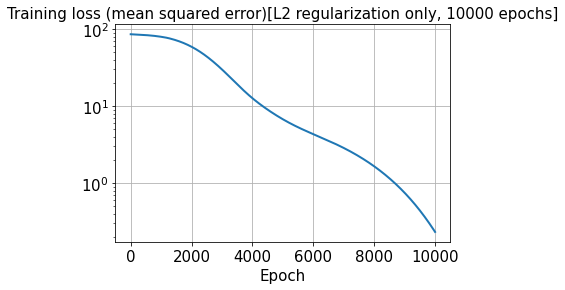

In [16]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.yscale("log")
plt.title('Training loss (mean squared error)[L2 regularization only, 10000 epochs]', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.grid()
plt.show()

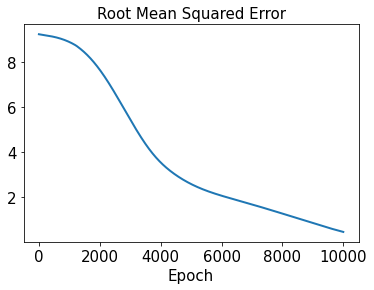

In [17]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [18]:
decoded_sensor_train = sensor_pred1.predict(t_train)

In [19]:
decoded_sensor_test = sensor_pred1.predict(t_test)

In [20]:
error_train_abs = np.abs(decoded_sensor_train - x_train)

In [21]:
error_test_abs = np.abs(decoded_sensor_test - x_test)

In [22]:
error_train_abs

array([[[2.02035189e-02],
        [5.69970846e-02],
        [3.94501686e-03],
        [7.06999779e-02],
        [8.10017586e-02],
        [9.16659355e-02],
        [1.58041859e-01],
        [1.96253872e-01],
        [1.68434429e-01],
        [2.83001900e-01],
        [2.21437645e-01],
        [2.51605415e-01],
        [2.78143501e-01],
        [3.50891876e-01],
        [3.61388206e-01],
        [3.83635712e-01]],

       [[5.89904368e-02],
        [1.67507792e-01],
        [9.85589027e-03],
        [2.07950163e-01],
        [2.43019581e-01],
        [2.73514223e-01],
        [4.68046093e-01],
        [5.88245249e-01],
        [4.99955940e-01],
        [8.84020329e-01],
        [6.61593628e-01],
        [7.55961323e-01],
        [8.36644745e-01],
        [1.13890247e+00],
        [1.19368792e+00],
        [1.18083401e+00]],

       [[2.79610872e-02],
        [7.90992737e-02],
        [5.12728691e-03],
        [9.81502056e-02],
        [1.13405943e-01],
        [1.28035831e-01],
        

In [23]:
l2_error_sensor_train = np.sqrt(np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2))
print(l2_error_sensor_train)

0.0500704801961229


In [24]:
l2_error_sensor_test = np.sqrt(np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2))
print(l2_error_sensor_test)

0.048853008603046054
